In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.animation as animation
import math

# **Finding the Smallest Enclosing Circle**

## **Problem Statement**
Given a set of **N random points** in the plane, we need to determine the **smallest circle** that encloses all these points. The process consists of the following steps:


In [2]:
class Points:
    """ 
    Clase que representa coordenadas como objetos de tipo punto.
    Permite asignar nombres a los puntos de forma manual o automática.
    Cuenta con tres métodos dunder (mágicos) que establecen una relación 
    de orden entre dos puntos y definen su formato de impresión.
    
    """

    count_points = 0
    def __init__(self, coordinates, label=None):
        self.x = coordinates[0]
        self.y = coordinates[1]
        if label is None:
            self.label = f"P{Points.count_points}"
            Points.count_points += 1
        else:
            self.label = label
        
    
    def __lt__(self, other):
        """Define la relación de orden entre dos puntos."""
        return (self.y > other.y) or (self.y == other.y and self.x < other.x)

    def __str__(self):
        return f"{self.label} ({self.x}, {self.y})"
    def __repr__(self):
        return self.__str__()
    def reset_count(self):
        Points.count_points = 0
    
def plot_points(points, centroid=None):
    """Visualiza los puntos en un gráfico, con o sin el barycentro calculado."""
   # Dibujar todos los puntos
    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.scatter(x, y, c='blue', label="Puntos")
    if centroid is not None:
        plt.scatter(centroid.x, centroid.y, c='red', label="Centroide")
    for p in points:
            plt.text(p.x, p.y, p.label, fontsize=8, ha='right', va='bottom', color='black')
        



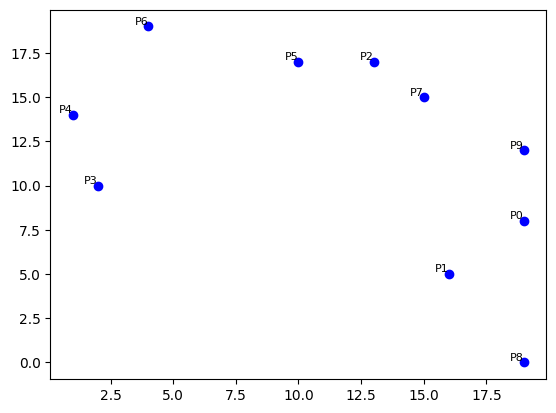

In [3]:
#INICIALIZACION DE LOS PUNTOS
N = 10
np . random . seed ( 27 )
points = [Points( [np . random . randint (0 , 20 ) , np . random . randint (0 , 20 )] ) for _ in range ( N )]
plot_points(points)



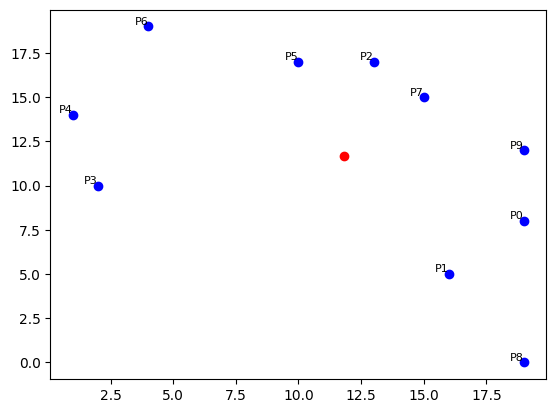

In [4]:
#calculo del centroide y visualizacion de este respecto a los puntos

mean_x = np.mean([po.x for po in points])
mean_y = np.mean([po.y for po in points])

centroide = Points([mean_x, mean_y],label='centroid')
plot_points(points , centroide)




In [5]:
def calcular_distancias(points, centroide):
    """Calcula y ordena las distancias de los puntos al centroide."""
    distancias = {po: np.sqrt((po.x - centroide.x) ** 2 + (po.y - centroide.y) ** 2) for po in points}
    return dict(sorted(distancias.items(), key=lambda item: item[1], reverse=True))

def plot_circulo_y_puntos(points, centroide, punto_mas_alejado, max_dist):
    """
    Dibuja los puntos, el centroide y el círculo con radio igual a la distancia máxima encontrada
    entre el centroide y los puntos.
    
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Dibujar los puntos
    x_vals = [p.x for p in points]
    y_vals = [p.y for p in points]
    ax.scatter(x_vals, y_vals, color='blue', label="Puntos", zorder=3)

    # Dibujar el centroide
    ax.scatter(centroide.x, centroide.y, color='red', label="Centroide", marker="x", s=150, zorder=4)

    # Dibujar el punto más alejado
    ax.scatter(punto_mas_alejado.x, punto_mas_alejado.y, color='green', label="Punto más alejado", zorder=4)

    # Dibujar el círculo
    circulo = plt.Circle((centroide.x, centroide.y), max_dist, color='orange', fill=False, linestyle="dashed", lw=2, zorder=2)
    ax.add_patch(circulo)

    # Ajustar los límites para que el círculo sea visible completamente
    ax.set_xlim(centroide.x - max_dist - 2, centroide.x + max_dist + 2)
    ax.set_ylim(centroide.y - max_dist - 2, centroide.y + max_dist + 2)

    # Configuración del gráfico
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_aspect('equal')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3)
    plt.title("Puntos, Centroide y Círculo con Radio Máximo")
    plt.grid(True)
    plt.show()

Punto más alejado: P8 (19, 0), Distancia: 13.74


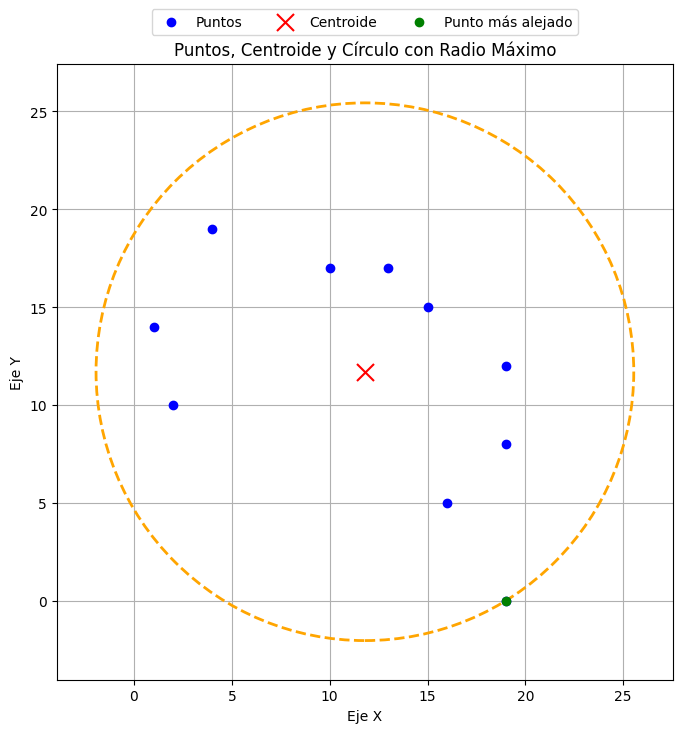

In [6]:

# Obtener el punto más alejado
distancias = calcular_distancias(points, centroide)
punto_mas_alejado, max_dist = next(iter(distancias.items()))

print(f"Punto más alejado: {punto_mas_alejado}, Distancia: {max_dist:.2f}")

# Llamamos a la función para graficar con la nueva escala y leyenda mejor ubicada
plot_circulo_y_puntos(points, centroide, punto_mas_alejado, max_dist)


#### Según el algoritmo propuesto en el ejercicio, encontraremos el círculo mínimo que contiene todos los puntos, partiendo del círculo generado con el centroide.
Para ello, utilizaremos tres funciones que cumplen propiedades geométricas específicas:

### Círculo Definido por Dos Puntos

Dado dos puntos $P_1(x_1, y_1)$ y $P_2(x_2, y_2)$ en el plano, el círculo que los contiene y cuyo diámetro es el segmento $P_1P_2$ tiene las siguientes propiedades:

- **Centro**: Se encuentra en el punto medio del segmento $$P_1P_2$$.
- **Radio**: Es la mitad de la distancia euclidiana entre los dos puntos.

El centro $(h, k)$ se calcula como:

$$
h = \frac{x_1 + x_2}{2}, \quad k = \frac{y_1 + y_2}{2}
$$

El radio $r$ se obtiene como:

$$
r = \frac{\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}}{2}
$$

---

### Círculo Definido por Tres Puntos

### Cálculo del Circuncentro y Circuncírculo

## 📌 Representación Matricial del Circuncentro

Dado un triángulo con vértices $ P_1(x_1, y_1) $, $ P_2(x_2, y_2) $ y $ P_3(x_3, y_3) $, el circuncentro es el punto donde se intersectan las mediatrices de los lados del triángulo. 

Podemos expresar el problema como un **sistema de ecuaciones lineales** en forma matricial:

$$
\begin{bmatrix}
2(x_2 - x_1) & 2(y_2 - y_1) \\
2(x_3 - x_1) & 2(y_3 - y_1)
\end{bmatrix}
\begin{bmatrix}
h \\ k
\end{bmatrix}
=
\begin{bmatrix}
x_2^2 + y_2^2 - x_1^2 - y_1^2 \\
x_3^2 + y_3^2 - x_1^2 - y_1^2
\end{bmatrix}
$$

Donde:

- **(h, k)** son las coordenadas del **circuncentro**.
- La matriz de coeficientes representa las diferencias entre las coordenadas de los puntos.
- El vector del lado derecho representa las diferencias de las sumas de cuadrados de las coordenadas.

---

## 📌 Resolviendo el Sistema

Podemos escribir el sistema como:

$$
\mathbf{A} \cdot \mathbf{x} = \mathbf{b}
$$

Donde:

$$
\mathbf{A} =
\begin{bmatrix}
2(x_2 - x_1) & 2(y_2 - y_1) \\
2(x_3 - x_1) & 2(y_3 - y_1)
\end{bmatrix}
$$

$$
\mathbf{x} =
\begin{bmatrix}
h \\ k
\end{bmatrix}
$$

$$
\mathbf{b} =
\begin{bmatrix}
x_2^2 + y_2^2 - x_1^2 - y_1^2 \\
x_3^2 + y_3^2 - x_1^2 - y_1^2
\end{bmatrix}
$$

Para encontrar $ \mathbf{x} $, simplemente invertimos la matriz $ \mathbf{A} $ (si es invertible):

$$
\mathbf{x} = \mathbf{A}^{-1} \cdot \mathbf{b}
$$

O podemos resolverlo numéricamente en Python usando **numpy**:



In [7]:

def punto_en_circulo(punto, centro, radio):
    """Devuelve True si el punto está dentro o sobre el círculo, False si está fuera."""
    distancia_cuadrada = (punto.x - centro.x) ** 2 + (punto.y - centro.y) ** 2
    return distancia_cuadrada <= radio ** 2


def crear_circulo_dos_puntos(p1, p2):
    """
    
    
    """
    centro_x = (p1.x + p2.x) / 2
    centro_y = (p1.y + p2.y) / 2
    radio = np.sqrt((p2.x - p1.x) ** 2 + (p2.y - p1.y) ** 2) / 2
    return Points([centro_x, centro_y]), radio 

def crear_circulo_tres_puntos(p1, p2, p3):
    """
    Crea un círculo que pasa exactamente por tres puntos.
    """

    # Extraemos las coordenadas
    x1, y1 = p1.x, p1.y
    x2, y2 = p2.x, p2.y
    x3, y3 = p3.x, p3.y

    # Construcción de la matriz A y el vector b
    A = np.array([
        [2 * (x2 - x1), 2 * (y2 - y1)],
        [2 * (x3 - x1), 2 * (y3 - y1)]
    ])

    b = np.array([
        x2**2 + y2**2 - x1**2 - y1**2,
        x3**2 + y3**2 - x1**2 - y1**2
    ])

    # Resolver el sistema Ax = b
    try:
        h, k = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None, None  # Los puntos son colineales

    # Centro del círculo
    centro = Points([h, k])

    # Cálculo del radio usando la distancia a cualquier punto (ejemplo p1)
    radio = np.sqrt((h - x1) ** 2 + (k - y1) ** 2)

    return centro, radio
 # Devuelve el centro y el radio del círculo


min_radio = max_dist #redefinimos las variables para comenzar con nuestro algoritmo
min_centro = centroide

#primer bucle para encontrar el caso de dos puntos forman el disco minimo
for pi in points:
    for pj in points:
        if pi != pj:
            centro, radio = crear_circulo_dos_puntos(pi, pj)
            
            if all(punto_en_circulo(pk, centro, radio) for pk in points):
                # Si el nuevo radio es menor, lo actualizamos
                if radio < min_radio:
                    min_centro, min_radio = centro, radio

#segundo bucle para encontrar el caso de tres puntos forman el disco minimo
for pi in points:
    for pj in points:
        for pk in points:
            if pi != pj and pi != pk and pj != pk:
                centro, radio = crear_circulo_tres_puntos(pi, pj, pk)
                
                # Si los puntos eran colineales, se devuelve None, así que lo ignoramos
                if centro is None:
                    continue  

                # Verificamos si todos los puntos están dentro del círculo generado
                if all(punto_en_circulo(po, centro, radio) for po in points):
                    if radio < min_radio:
                        min_centro, min_radio = centro, radio

                    



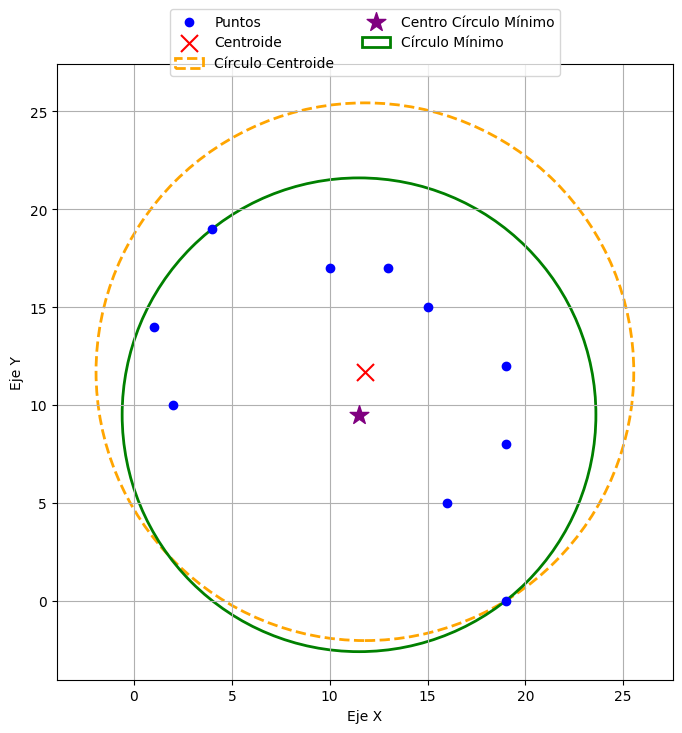

In [8]:
def plotear_circulos(points, centroide, radio_centroide, min_centro, min_radio):
    """Dibuja los puntos y los círculos del centroide y del círculo mínimo."""
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Dibujar los puntos
    x_vals = [p.x for p in points]
    y_vals = [p.y for p in points]
    ax.scatter(x_vals, y_vals, color='blue', label="Puntos", zorder=3)

    # Dibujar el centroide
    ax.scatter(centroide.x, centroide.y, color='red', label="Centroide", marker="x", s=150, zorder=4)

    # Dibujar el círculo basado en el centroide
    circulo_centroide = plt.Circle((centroide.x, centroide.y), radio_centroide, 
                                   color='orange', fill=False, linestyle="dashed", lw=2, label="Círculo Centroide")
    ax.add_patch(circulo_centroide)

    # Dibujar el círculo mínimo encontrado
    ax.scatter(min_centro.x, min_centro.y, color='purple', label="Centro Círculo Mínimo", marker="*", s=200, zorder=4)
    circulo_min = plt.Circle((min_centro.x, min_centro.y), min_radio, 
                             color='green', fill=False, linestyle="solid", lw=2, label="Círculo Mínimo")
    ax.add_patch(circulo_min)

    # Ajustar los límites para que los círculos sean visibles completamente
    max_radius = max(radio_centroide, min_radio)
    ax.set_xlim(centroide.x - max_radius - 2, centroide.x + max_radius + 2)
    ax.set_ylim(centroide.y - max_radius - 2, centroide.y + max_radius + 2)

    # Configuración del gráfico
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_aspect('equal')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
    # plt.title("Puntos y Círculos Calculados")
    plt.grid(True)
    plt.show()

# Llamar a la función con los valores calculados
plotear_circulos(points, centroide, max_dist, min_centro, min_radio)


## 2 Let’s consider some questions:
#### Which models can be implemented using the convex hull algorithm? Which systems can be described by such models? In these cases, what do the points and the hullrepresent?
 
#### We already know that the sweep line will be one of our best friends. What are the main and most common applications of the sweep line? What role does the sweep line play in each of these cases.

# Aplicaciones del Algoritmo de Envolvente Convexa en Estadística y Geometría Computacional

La envolvente convexa tiene múltiples aplicaciones en estadística y geometría computacional. Según **Preparata y Shamos (1985)**, estas aplicaciones incluyen la detección de valores atípicos, funciones de profundidad estadística, agrupamiento de datos y análisis de regresión.

## 1️⃣ Detección de Valores Atípicos y Estimación Robusta

En estadística, los estimadores robustos buscan reducir el impacto de valores atípicos. La envolvente convexa se puede utilizar para **"pelar" capas de puntos extremos iterativamente** (método basado en la profundidad de Tukey).

### 📌 Interpretación Geométrica:
- Los puntos representan un conjunto de datos de observaciones.
- La envolvente convexa define la frontera que encierra todos los puntos.
- Los puntos dentro de la envolvente se consideran más centrales y confiables.
- Los puntos exteriores pueden indicar valores atípicos.

## 2️⃣ Profundidad de Datos y Funciones de Profundidad Estadística

La profundidad de un punto mide qué tan "central" es dentro de un conjunto de datos. Al eliminar capas de la envolvente convexa de forma recursiva, se obtiene un ranking basado en la profundidad de los datos.

### 📌 Interpretación Geométrica:
- Los puntos representan un conjunto de datos muestrales.
- Las capas de la envolvente convexa corresponden a niveles de profundidad.
- Los puntos más internos son más representativos de la muestra, mientras que las capas exteriores representan valores extremos.

## 3️⃣ Agrupamiento (Clustering) y Geometría Computacional

En problemas de agrupamiento, una forma de definir un grupo (cluster) es utilizando envolventes convexas. Además, la determinación del diámetro de un conjunto de puntos (máxima distancia entre dos puntos) se realiza con la envolvente convexa.

### 📌 Interpretación Geométrica:
- Los puntos representan elementos de datos a ser agrupados.
- La envolvente convexa define los límites del grupo.
- Los puntos más alejados en la envolvente determinan la extensión del grupo (diámetro).

## 4️⃣ Análisis de Regresión y Problemas de Aproximación

Los problemas de regresión a menudo implican ajustar una función a un conjunto de datos. La **regresión isotónica** (ajuste monótono de datos) usa envolventes convexas para garantizar que una función escalonada sea la mejor aproximación posible.

### 📌 Interpretación Geométrica:
- Los puntos representan datos empíricos.
- El límite inferior de la envolvente convexa define la mejor aproximación isotónica.
- Los bordes de la envolvente forman la mejor función escalonada de ajuste.

---

## 📖 Referencia:
**Preparata, F. P., & Shamos, M. I.** (1985). *Computational Geometry: An Introduction.* Springer.



## Aplicaciones del Algoritmo de Línea de Barrido en la Detección de Intersecciones en Redes Viales

La técnica de la línea de barrido es un paradigma fundamental en geometría computacional para detectar intersecciones entre segmentos de forma eficiente. Según Bentley y Ottmann (1979), este algoritmo permite procesar grandes conjuntos de datos, como tramos de carretera, identificando puntos de cruce críticos para la planificación urbana y la gestión del tráfico.

## 1️⃣ Planificación de Redes Viales y Detección de Cruces
En el contexto de redes viales, cada segmento representa un tramo de carretera y cada intersección es un cruce vial real. La línea de barrido recorre el plano de forma ordenada, permitiendo identificar automáticamente estas intersecciones.

### 📌 Interpretación Geométrica:
Segmentos: Representan tramos de carretera, definidos por un punto inicial y un punto final, junto con atributos como nombre, ancho y capacidad.

Puntos de Intersección: Indican cruces viales donde se conectan dos o más tramos, cruciales para determinar la ubicación de semáforos, rotondas y medidas de seguridad.

Línea de Barrido: Una línea que se desplaza (usualmente vertical u horizontal) y procesa eventos (extremos de segmentos e intersecciones) en orden secuencial.

## 2️⃣ Optimización del Flujo Vehicular y Seguridad Vial
La detección precisa de intersecciones permite mejorar la gestión del tráfico y la seguridad en el diseño urbano.

### 📌 Interpretación Geométrica:
Eventos de Intersección: Se registran cuando la línea de barrido encuentra el cruce de dos segmentos.

Actualización en Tiempo Real: Una estructura de datos (por ejemplo, un árbol balanceado) se actualiza conforme la línea de barrido avanza, facilitando la determinación de intersecciones y la gestión del flujo vehicular.

Aplicaciones Prácticas: Permite diseñar rutas alternativas, ubicar estratégicamente semáforos o rotondas y mejorar la seguridad vial.

### 📖 Referencias:
Bentley, J. L. y Ottmann, T. A. (1979). "Algorithms for Reporting and Counting Geometric Intersections", IEEE Transactions on Computers.

## Convex Hull

In [9]:
class Points:
    """ 
    Clase que representa coordenadas como objetos de tipo punto.
    Permite asignar nombres a los puntos de forma manual o automática.
    Cuenta con tres métodos dunder (mágicos) que establecen una relación 
    de orden entre dos puntos y definen su formato de impresión.
    
    """

    count_points = 0
    def __init__(self, coordinates, label=None):
        self.x = coordinates[0]
        self.y = coordinates[1]
        if label is None:
            self.label = f"P{Points.count_points}"
            Points.count_points += 1
        else:
            self.label = label
        
    
    def __lt__(self, other):
        """Define la relación de orden entre dos puntos."""
        return (self.y > other.y) or (self.y == other.y and self.x < other.x)

    def __str__(self):
        return f"{self.label} ({self.x}, {self.y})"
    def __repr__(self):
        return self.__str__()
    
    def reset_count(self):
        Points.count_points = 0

def cross_product(p, q, r):
    """Calcula el producto cruzado para determinar la orientación de tres puntos."""
    val = (q.x - p.x) * (r.y - p.y) - (q.y - p.y) * (r.x - p.x)
    if abs(val) < 1e-10:  
        return 0
    return 1 if val > 0 else -1  # 1 = giro a la derecha, -1 = giro a la izquierda

def find_p0(points):
    """Encuentra el punto con menor coordenada x (y si hay empate, el de menor y)."""
    p0 = points[0]
    for p in points[1:]:
        if p.x < p0.x or (p.x == p0.x and p.y < p0.y):
            p0 = p
    return p0

def generate_random_points(N, low_value, high_value, integer=True): 
    """Genera N puntos aleatorios en un rango especificado."""
    coordinates = []
    for i in range(N):
        x = int(np.random.uniform(low_value, high_value)) if integer else np.random.uniform(low_value, high_value)
        y = int(np.random.uniform(low_value, high_value)) if integer else np.random.uniform(low_value, high_value)
        label = f"P{i+1}"
        p = Points((x, y), label)
        coordinates.append(p)
    return coordinates


def right_turn(p0, p1, p2):
    """Determina si el giro es a la derecha."""
    return cross_product(p0, p1, p2) == 1

def visualize_hull(points, hull, current=None, candidate=None, pause=0.5):
    """
    Muestra la construcción progresiva del convex hull.
    Si se proporcionan 'current' y 'candidate', dibuja una línea discontinua
    que representa la evaluación actual entre el punto actual y el candidato.
    """
    plt.clf()
    
    # Dibujar todos los puntos
    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.scatter(x, y, c='blue', label="Puntos")
    
    # Dibujar la envolvente convexa actual
    if hull:
        hull_x = [p.x for p in hull]
        hull_y = [p.y for p in hull]
        plt.plot(hull_x, hull_y, 'r-', linewidth=2, label="Convex Hull")
        plt.scatter(hull_x, hull_y, c='red', marker='o')
        for p in hull:
            plt.text(p.x, p.y, p.label, fontsize=8, ha='right', va='bottom', color='black')
    
    # Dibujar la línea de evaluación actual (candidato)
    if current is not None and candidate is not None:
        plt.plot([current.x, candidate.x], [current.y, candidate.y], 'g--', linewidth=2, label="Candidato")
        plt.scatter([current.x], [current.y], c='orange', marker='D', s=100, label="Current")
        plt.scatter([candidate.x], [candidate.y], c='green', marker='s', s=100, label="Candidate")
    
    plt.legend()
    plt.draw()
    plt.pause(pause)


def convex_hull(points):
    """Calcula la envolvente convexa de un conjunto de puntos usando Jarvis March (Gift Wrapping)
    y visualiza cada iteración de la búsqueda del candidato."""
    if len(points) < 3:
        return points  # Si hay menos de 3 puntos, la envolvente es el conjunto mismo

    # 1. Seleccionar p0: el punto más a la izquierda (y en caso de empate, el que esté más arriba)
    p0 = find_p0(points)
    hull = [p0]
    current = p0

    plt.ion()  # Activar modo interactivo
    plt.figure()

    while True:
        # 2. Inicializar 'candidate' como el primer punto distinto de 'current'
        candidate = None
        for p in points:
            if p != current:
                candidate = p
                break
        if candidate is None:
            break  # Caso muy raro: no se encontró candidato

        # 3. Evaluar todos los puntos para actualizar el candidato
        for r in points:
            if r == current or r == candidate:
                continue
            # Visualizar la iteración actual: se muestra la línea entre 'current' y 'candidate'
            visualize_hull(points, hull, current, candidate, pause=0.3)
            # Si 'r' produce un giro a la izquierda respecto a (current, candidate),
            # significa que 'r' es más extremo y actualizamos el candidato.
            if cross_product(current, candidate, r) == -1:
                candidate = r
                # Visualizar la actualización del candidato
                # visualize_hull(points, hull, current, candidate, pause=0.3)

        # 4. Agregar el candidato definitivo a la envolvente y actualizar 'current'
        hull.append(candidate)
        visualize_hull(points, hull, current, candidate, pause=0.5)
        current = candidate

        # Si hemos vuelto al punto inicial, se ha cerrado la envolvente.
        if candidate == p0:
            break

    plt.ioff()  # Desactivar modo interactivo
    plt.show()
    return hull


def print_points(points):
    """Imprime el arreglo de Puntos que componen la envolvente convexa."""
    for i in points:
        print(f"{i.label} ({i.x}, {i.y})")

def print_points(points):
    """ arreglo de Puntos que componen la envolvente convexa """
    for i in points:
        print(f"{i.label} ({i.x}, {i.y})")




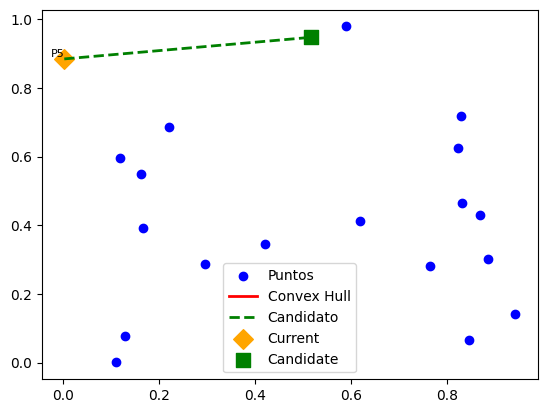

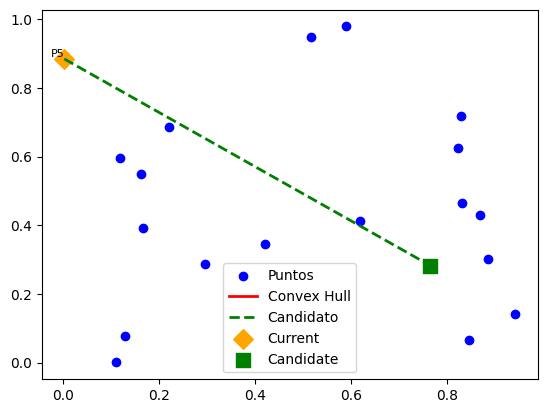

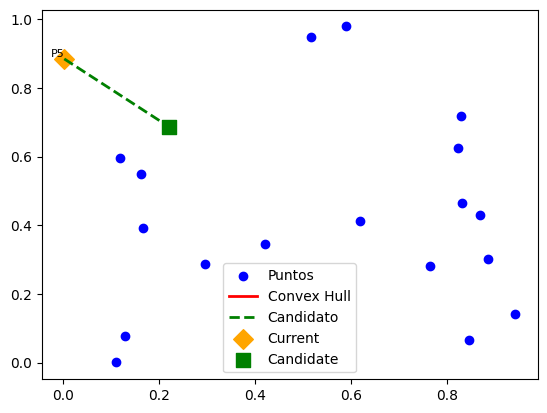

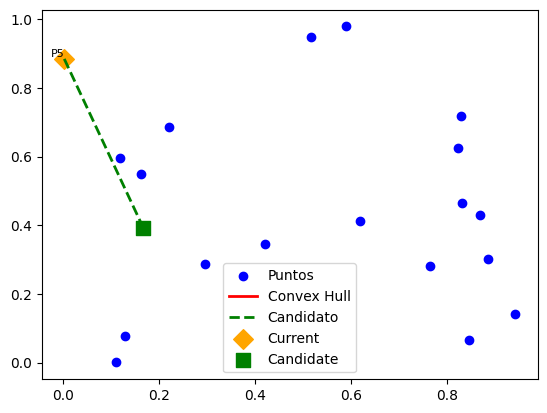

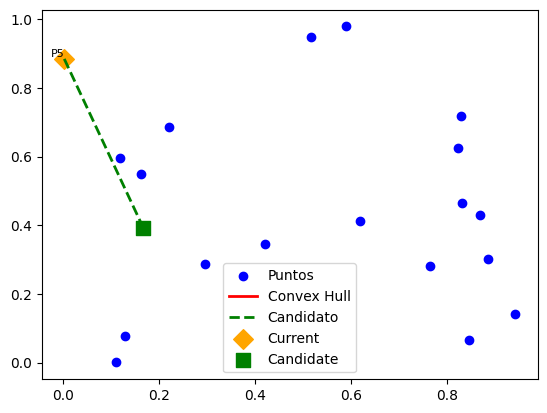

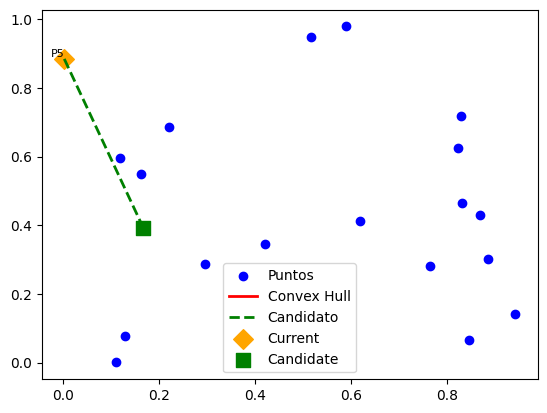

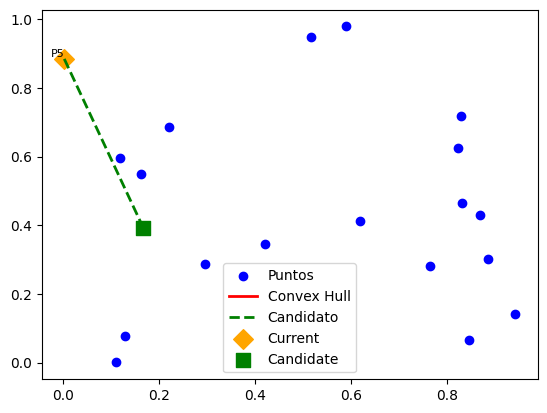

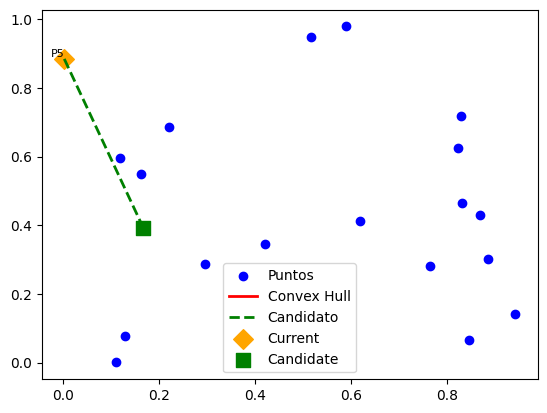

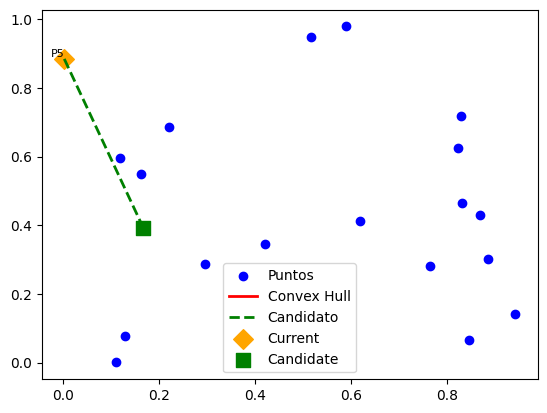

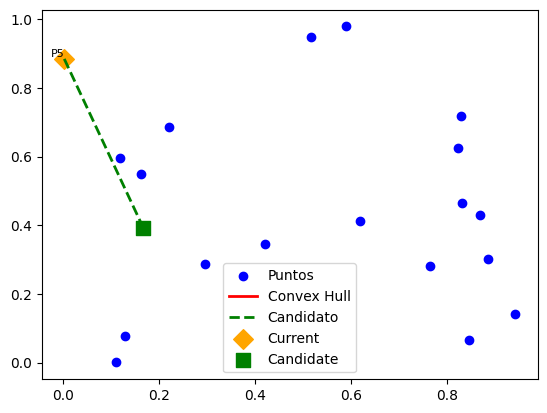

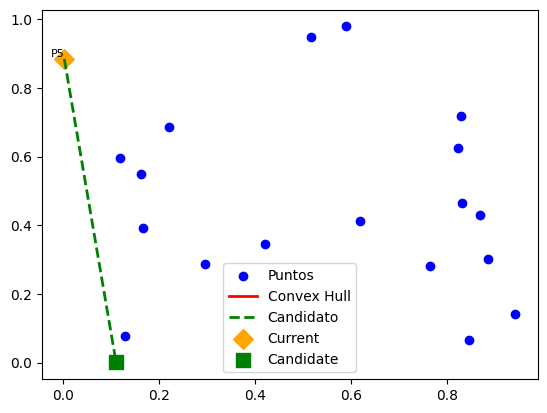

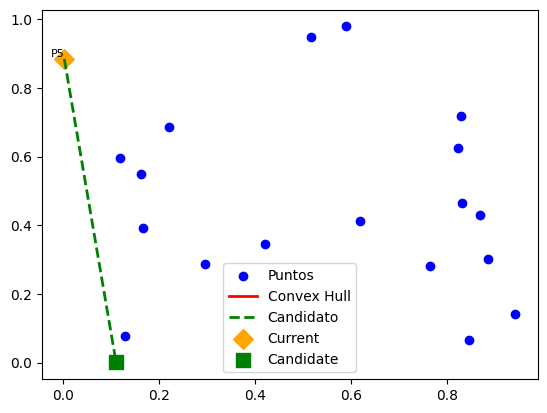

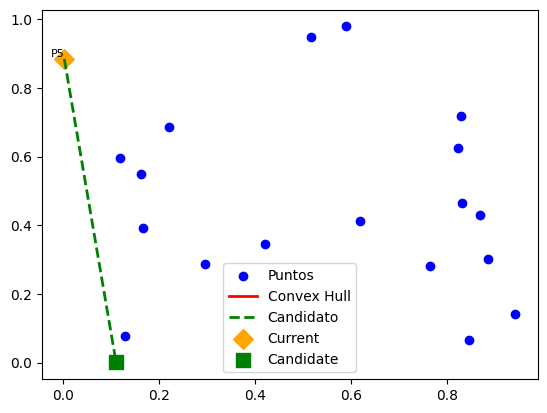

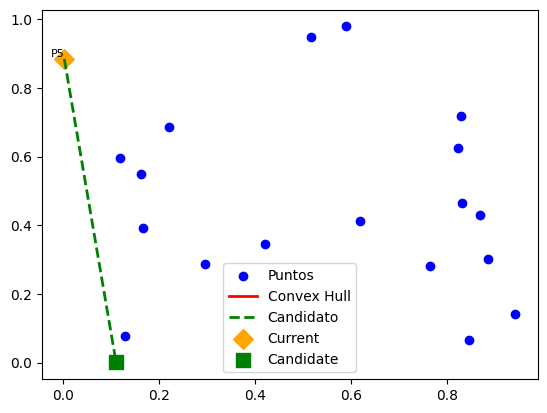

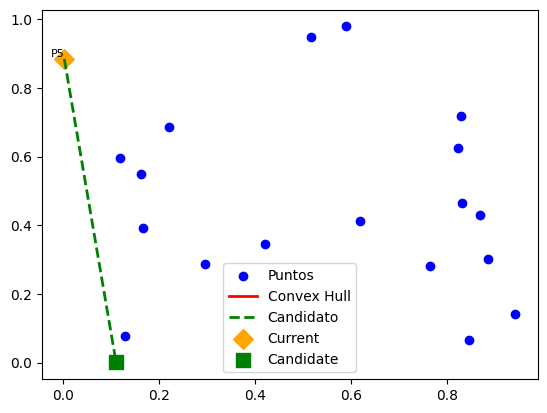

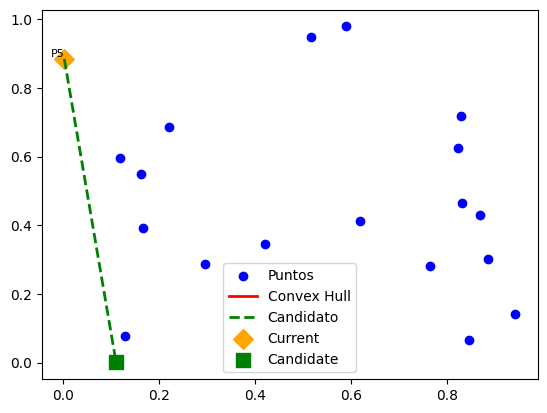

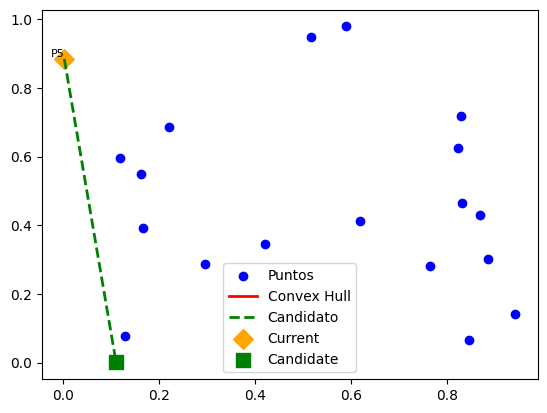

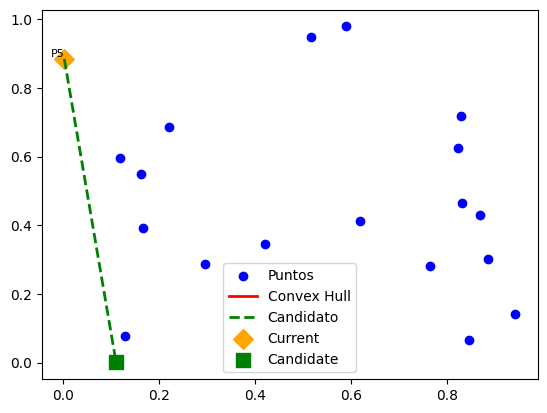

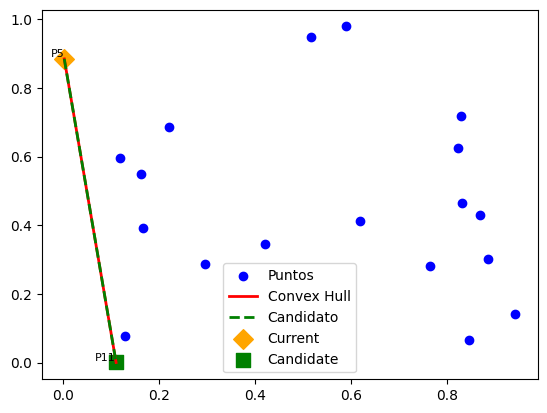

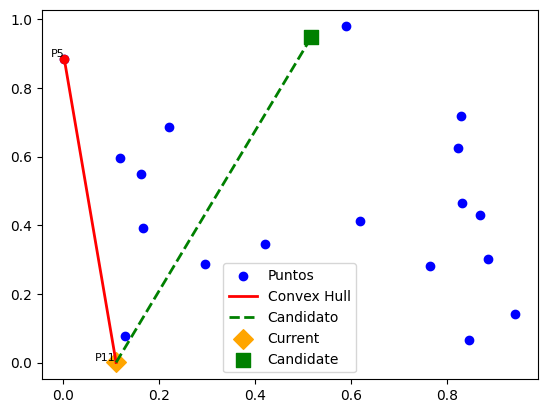

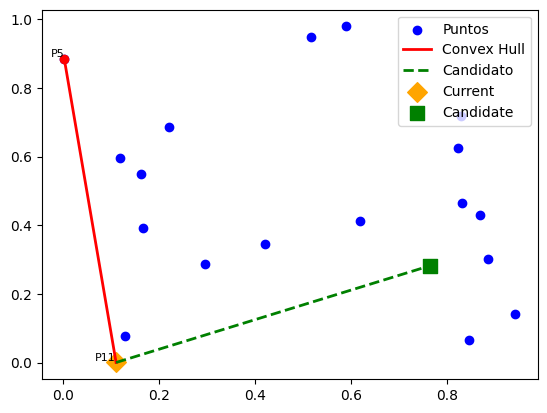

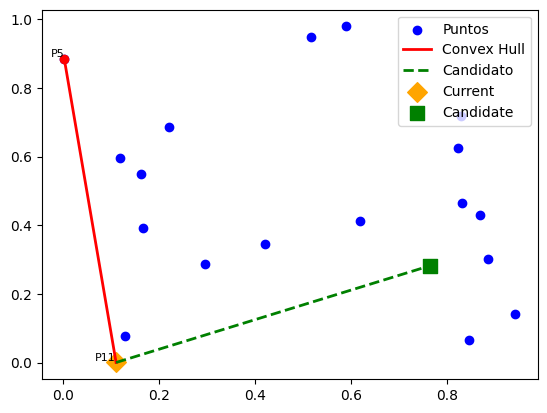

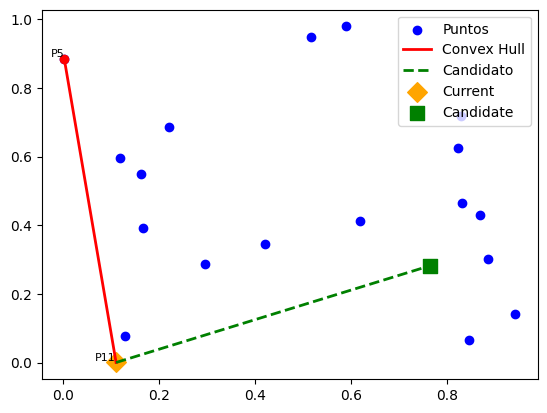

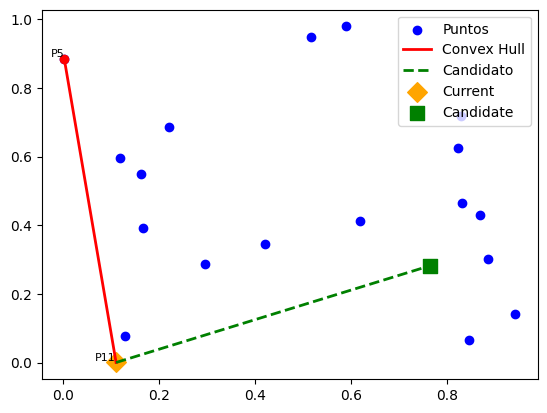

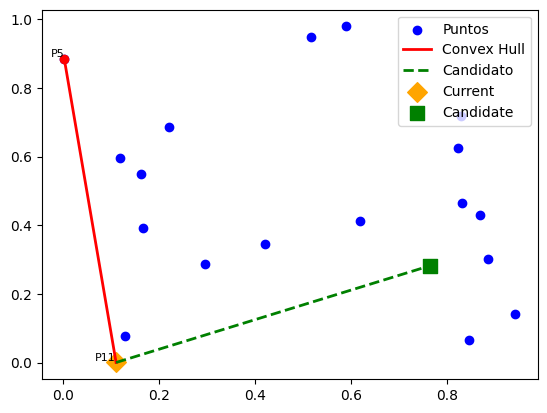

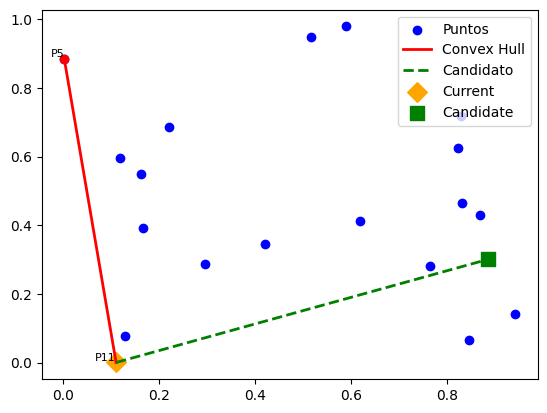

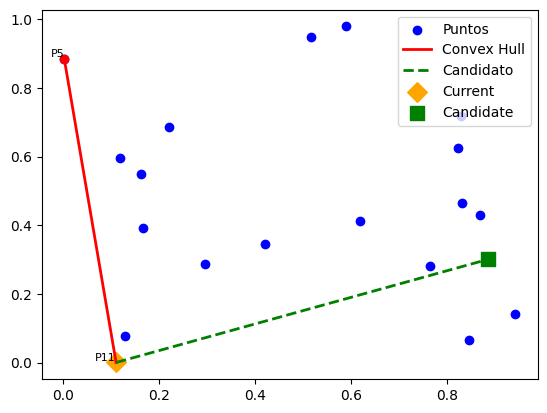

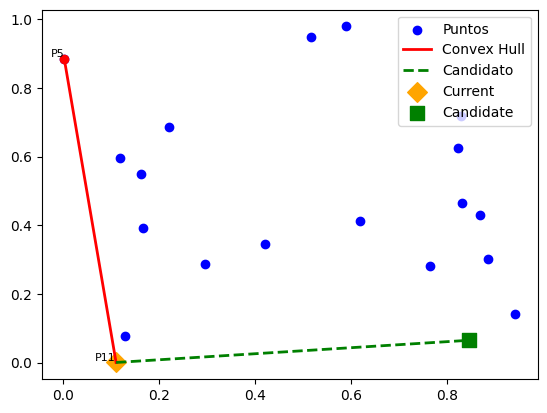

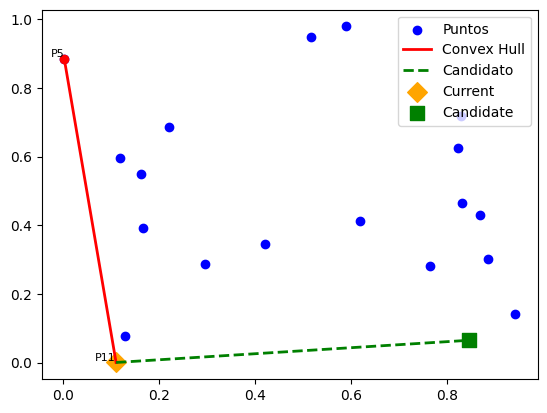

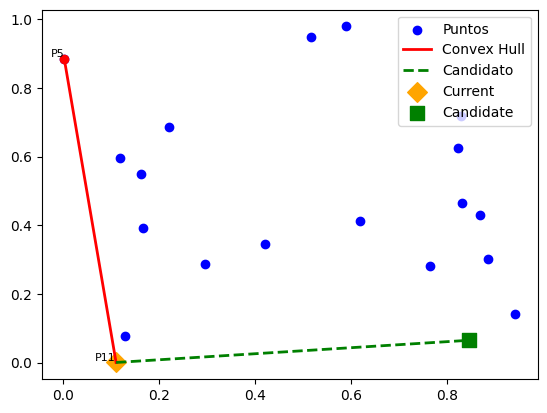

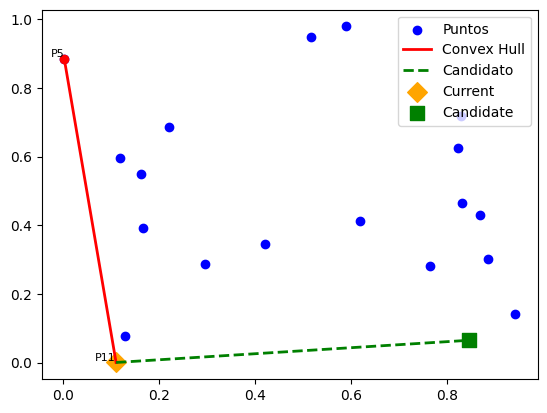

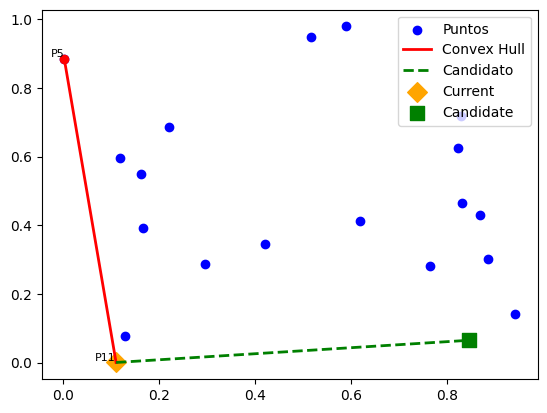

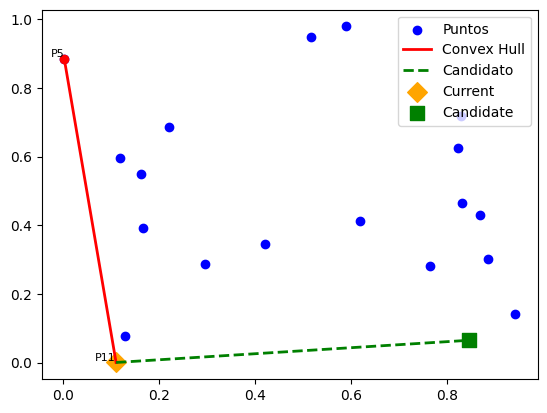

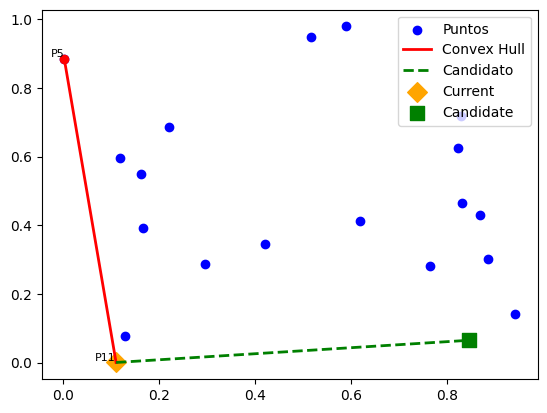

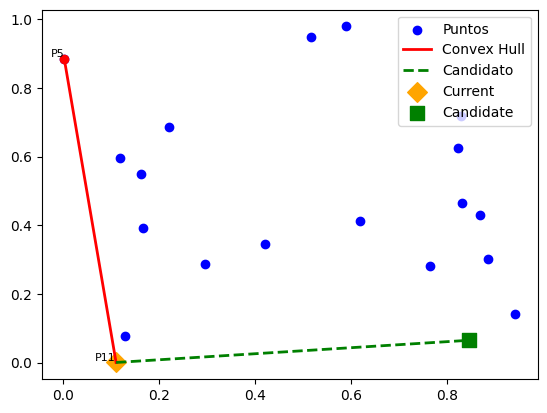

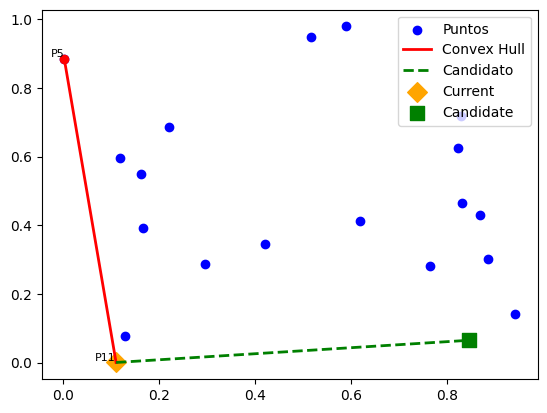

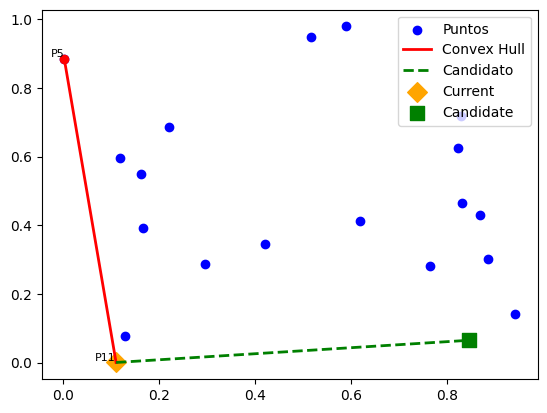

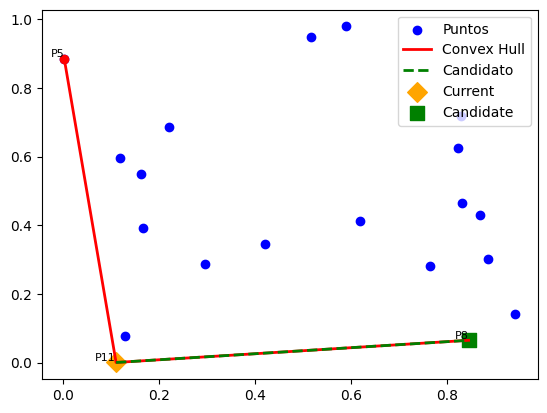

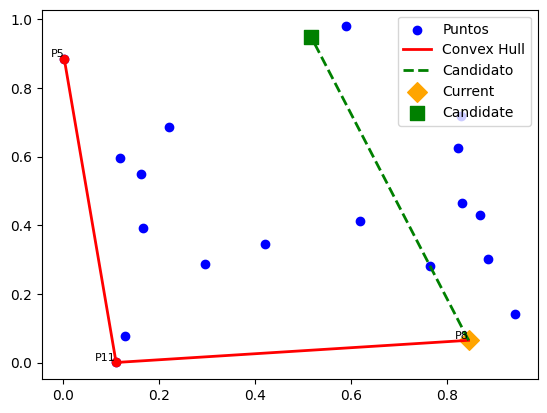

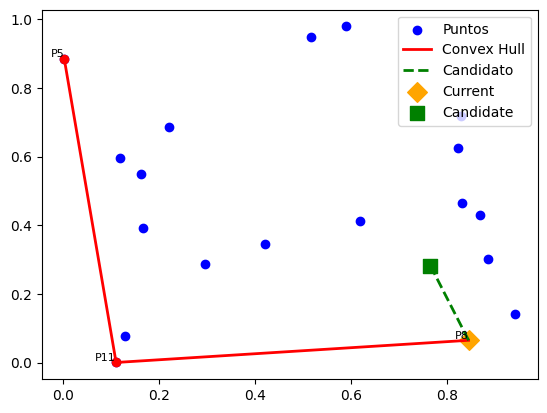

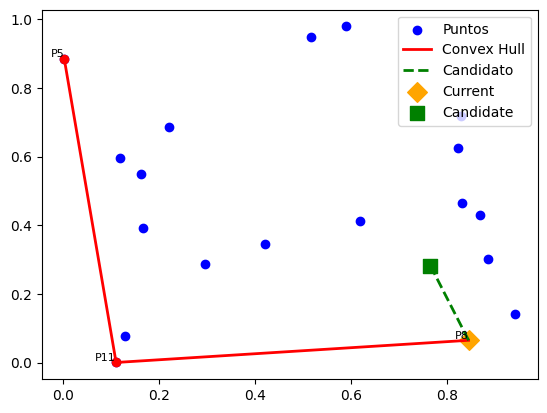

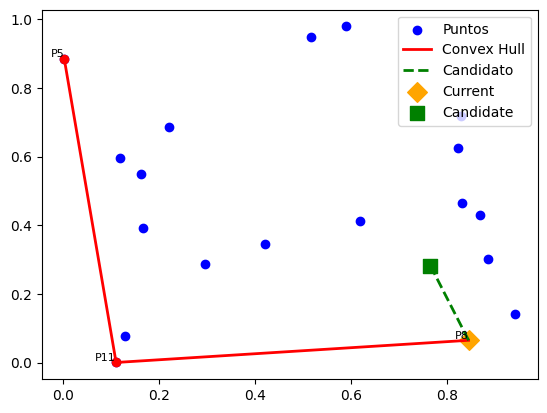

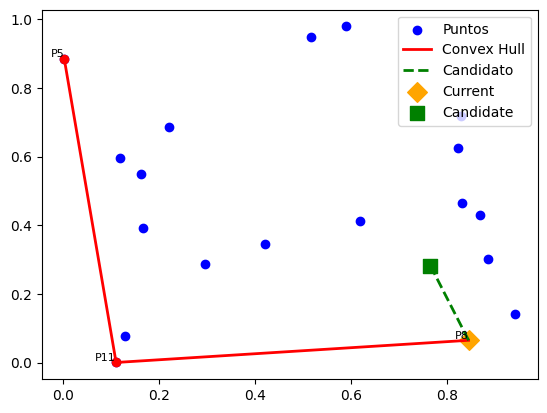

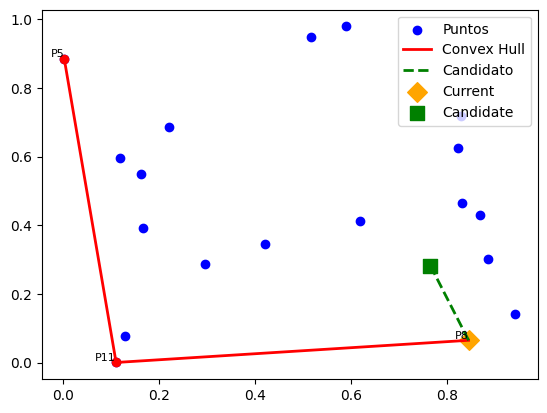

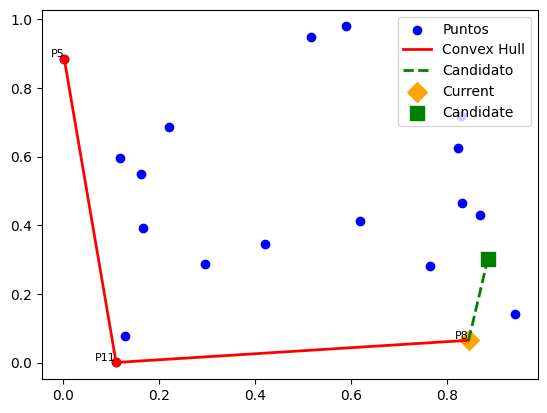

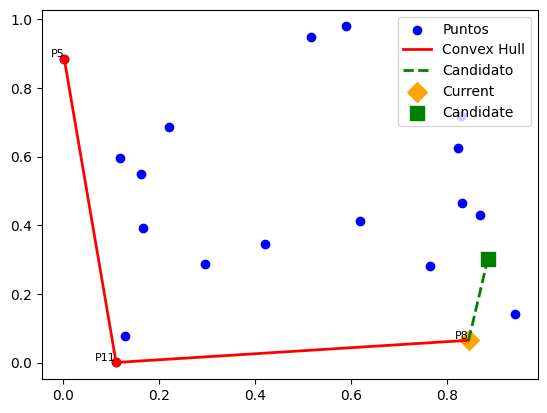

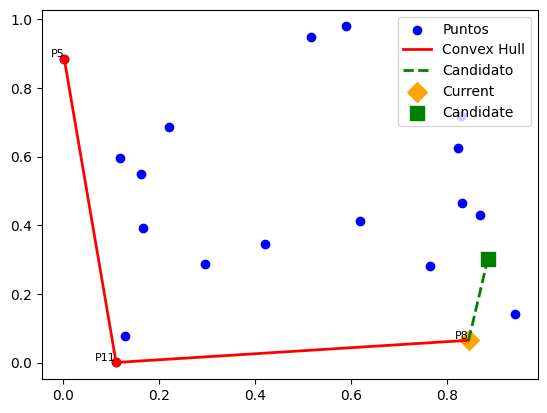

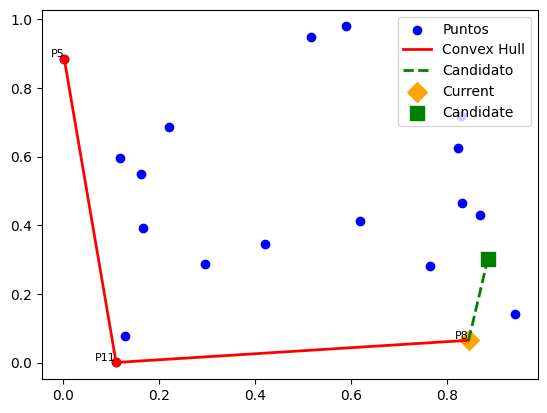

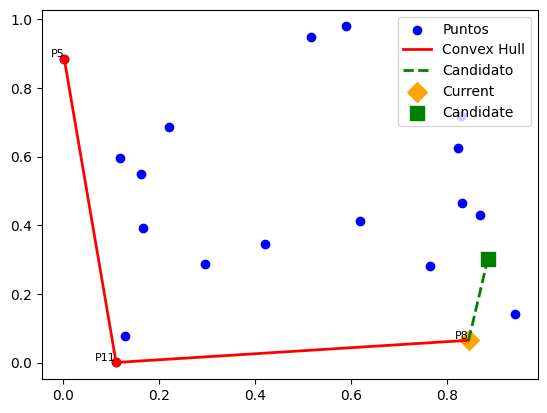

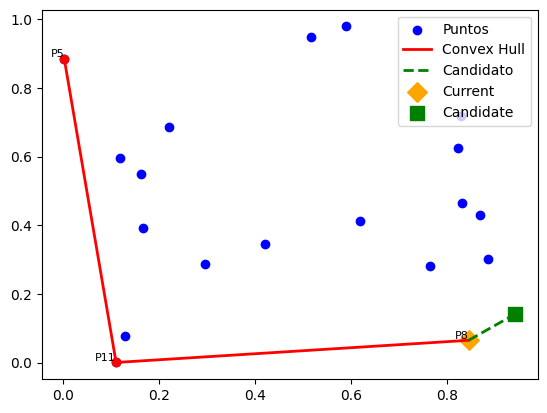

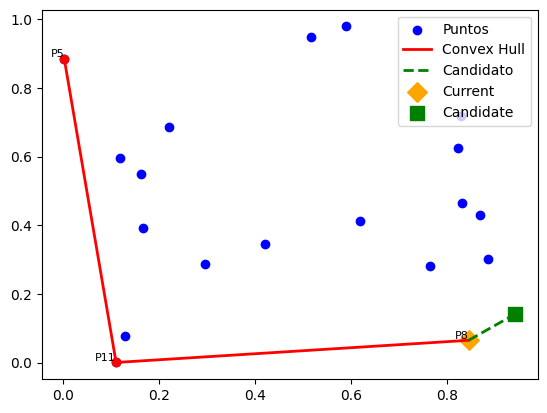

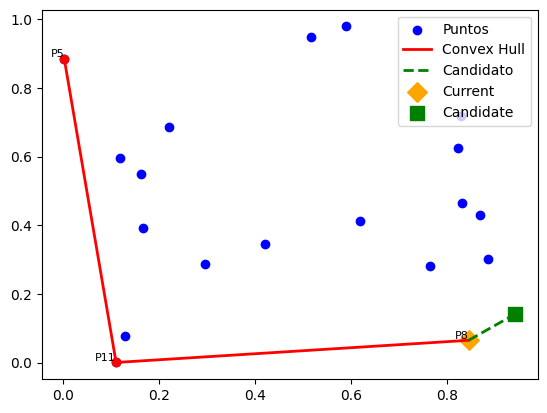

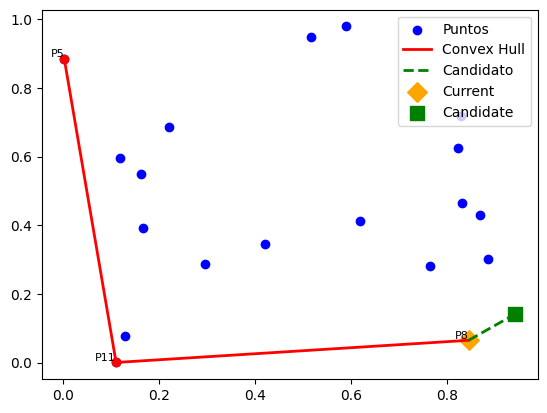

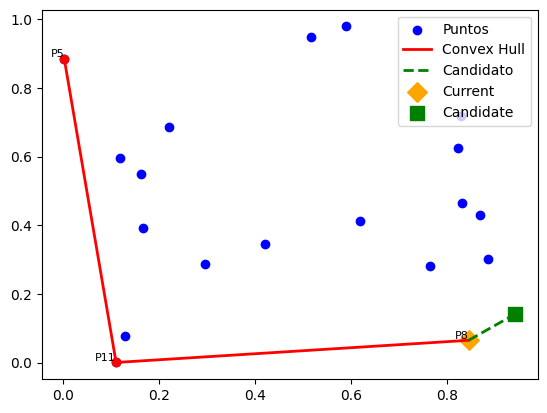

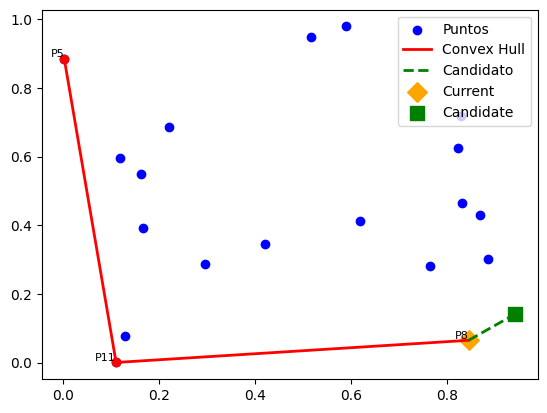

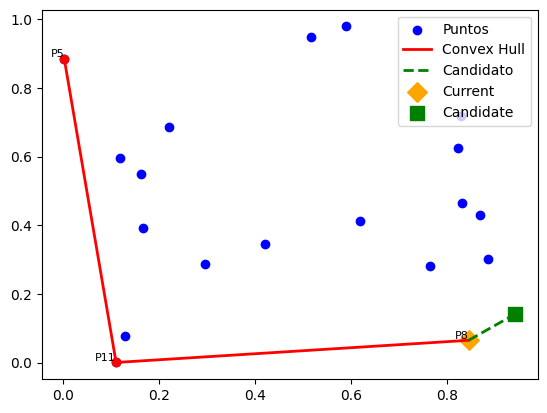

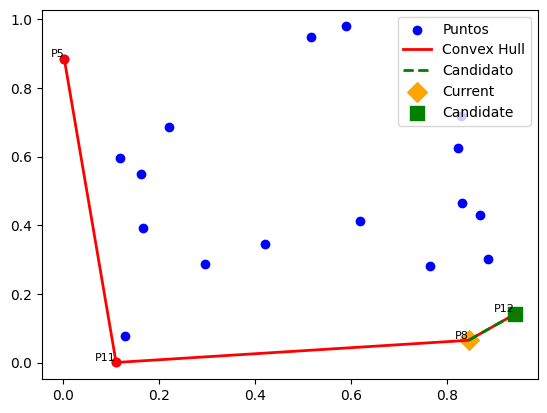

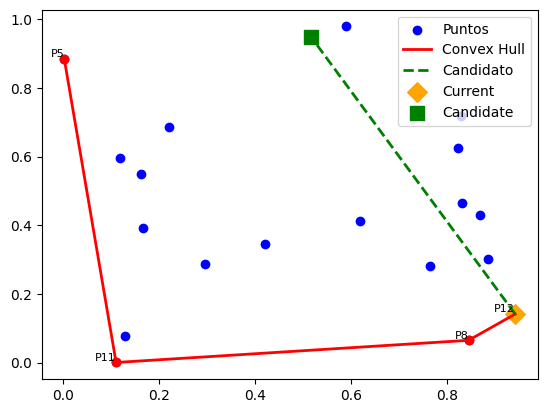

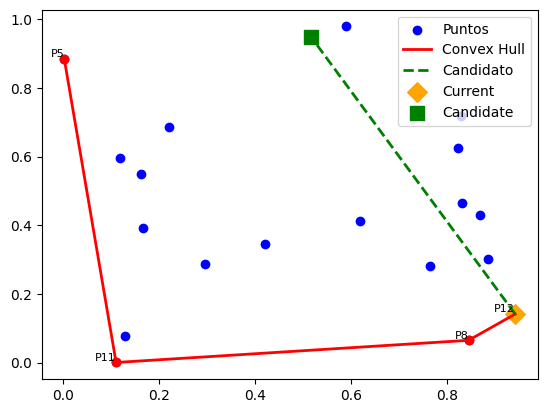

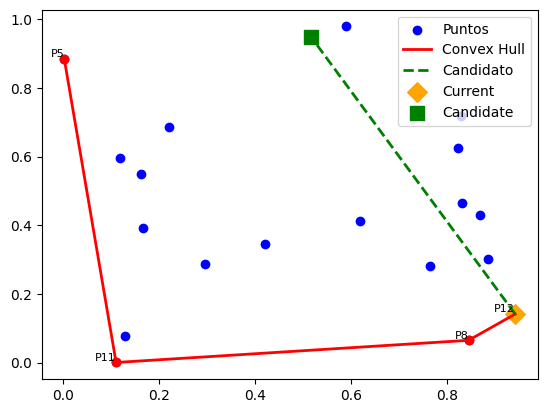

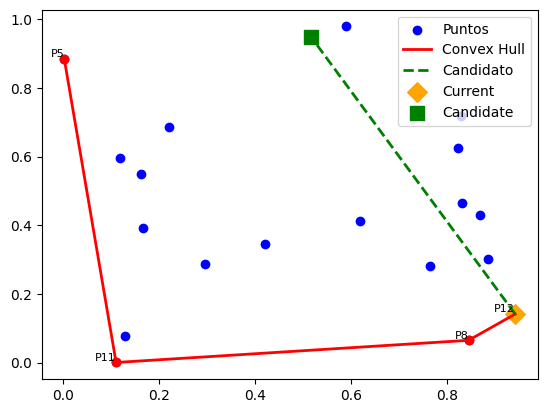

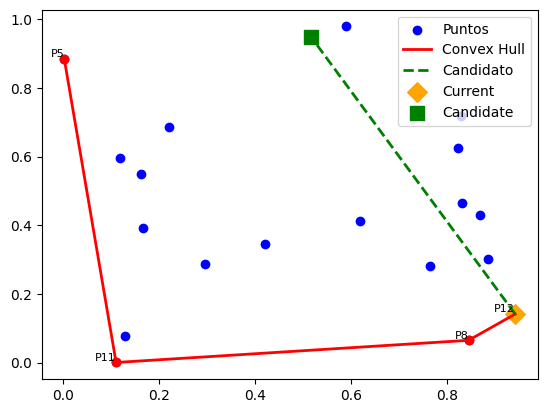

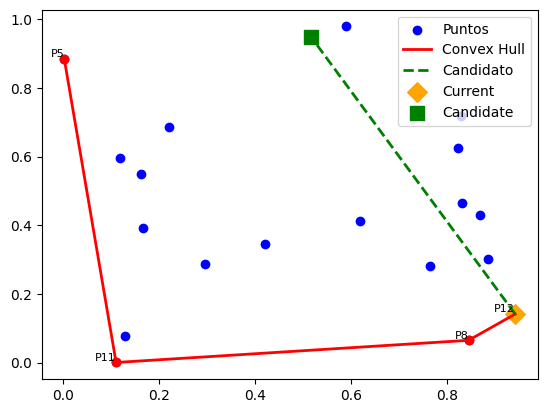

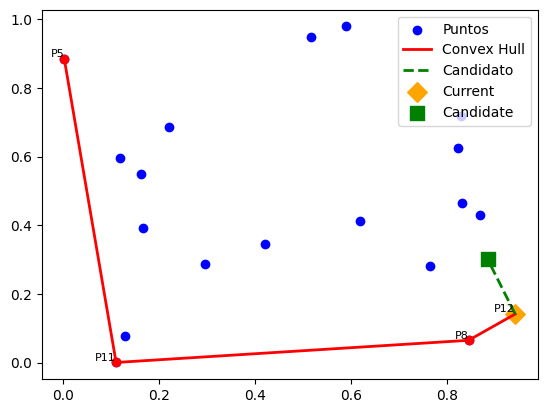

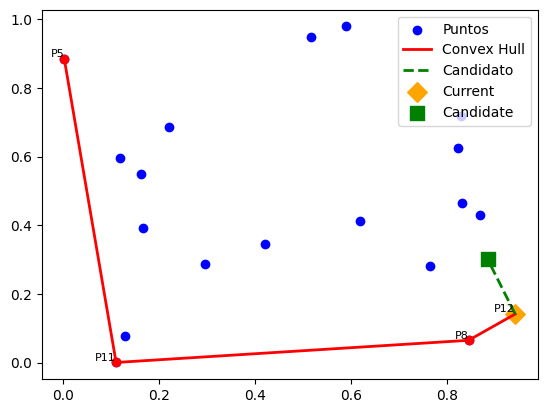

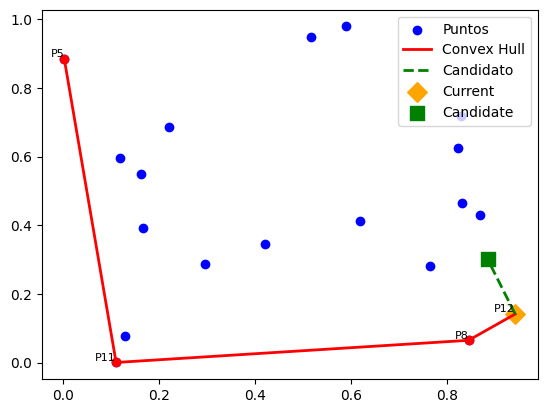

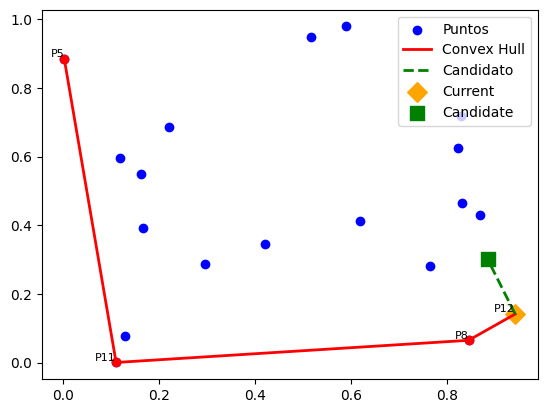

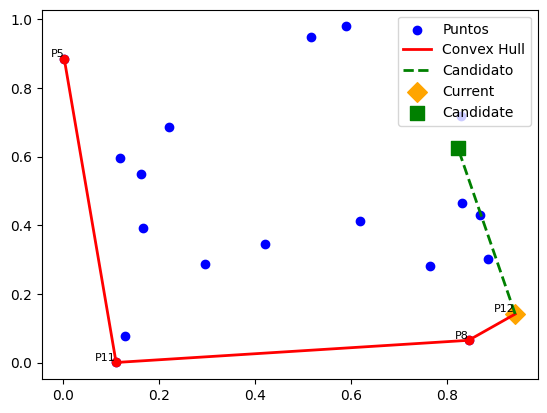

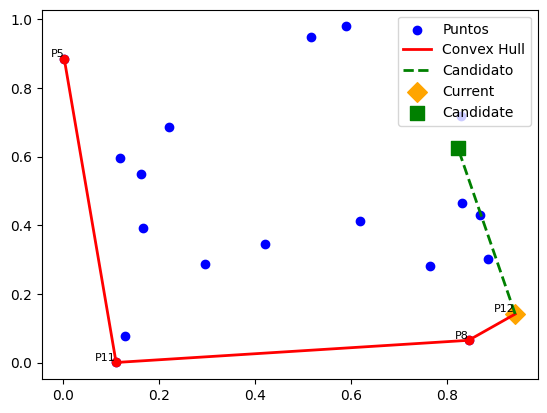

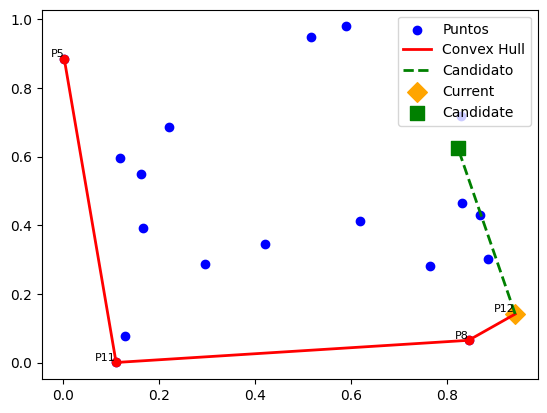

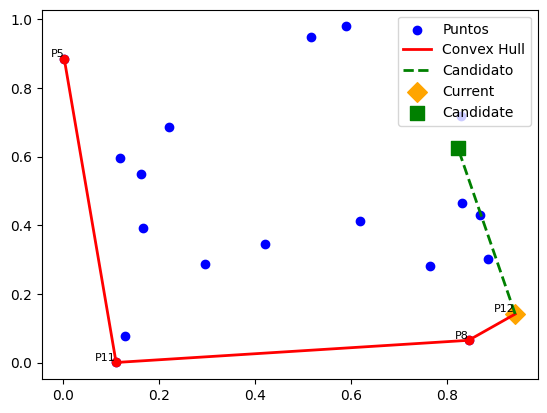

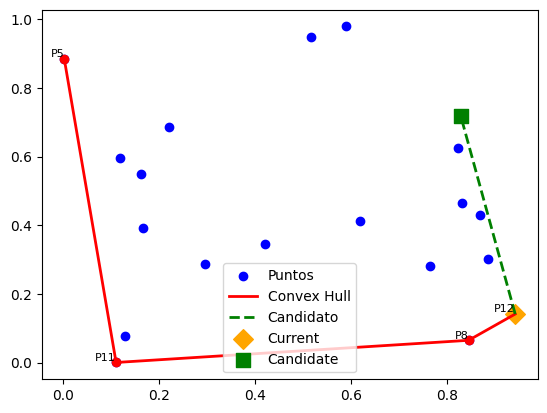

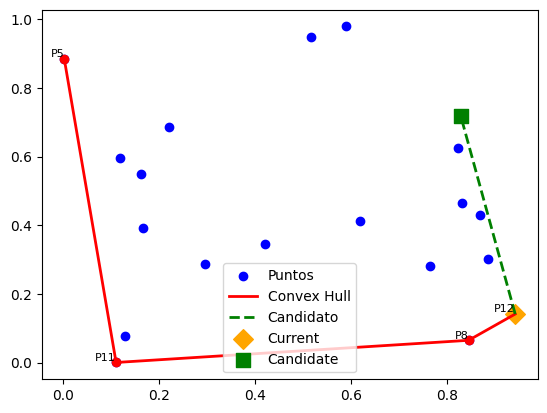

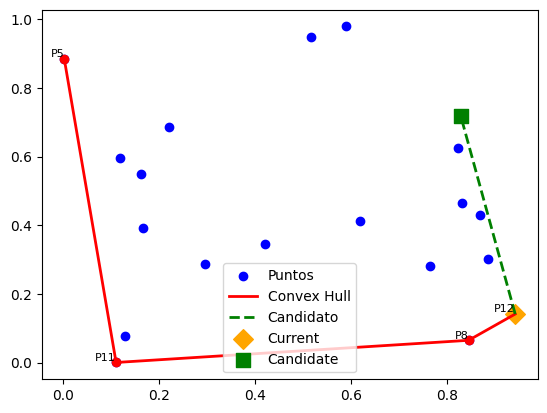

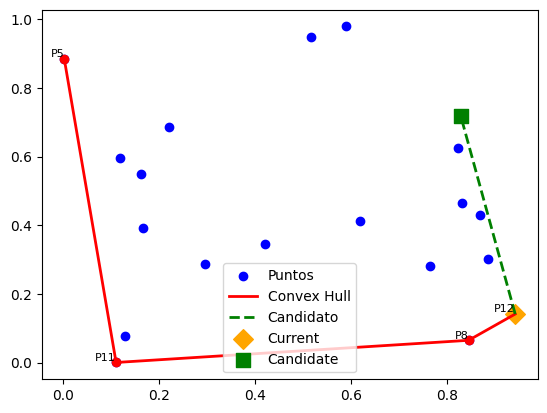

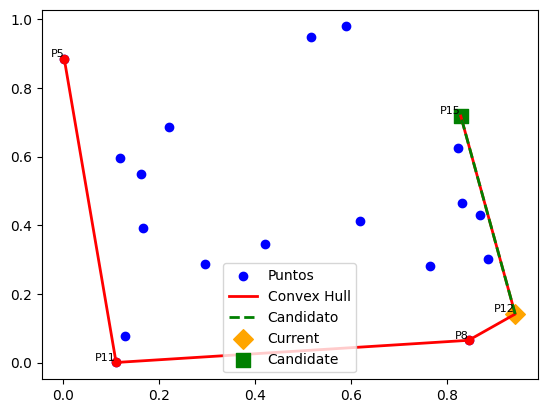

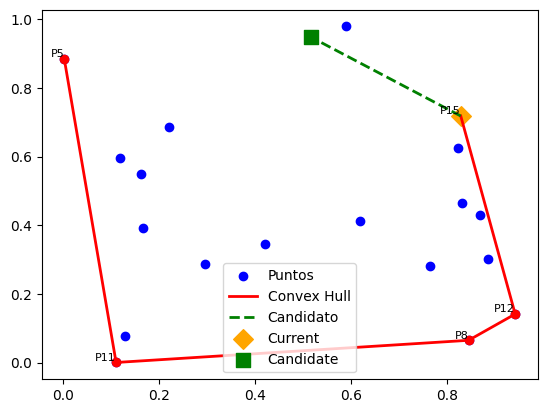

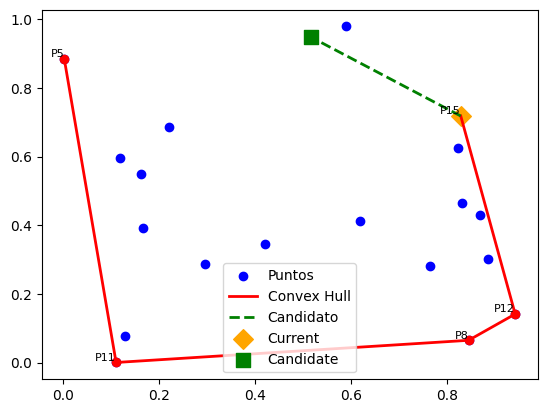

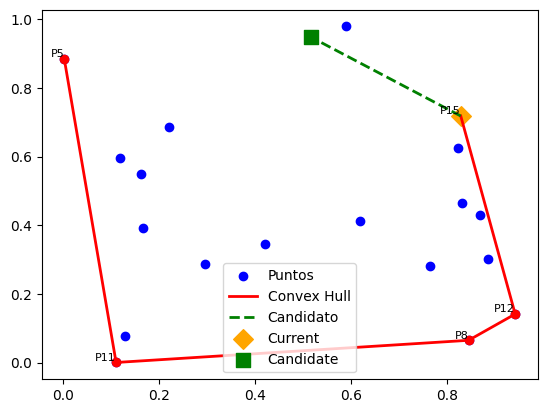

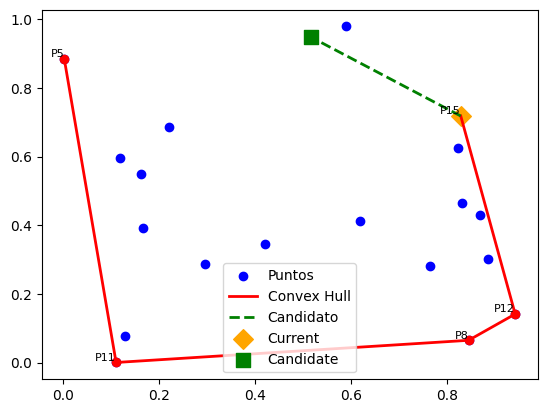

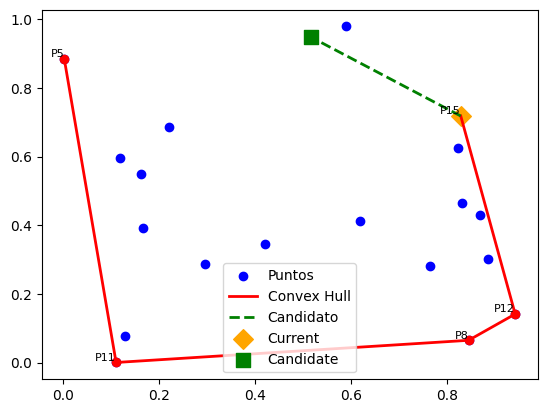

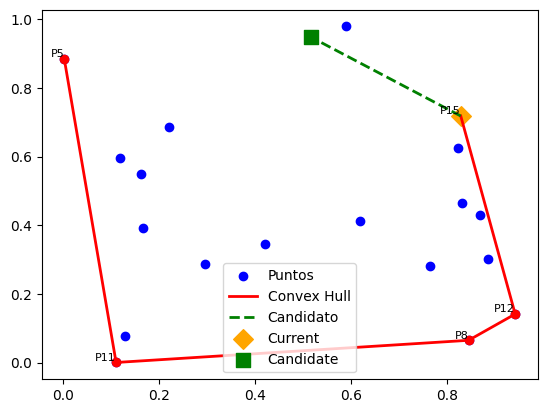

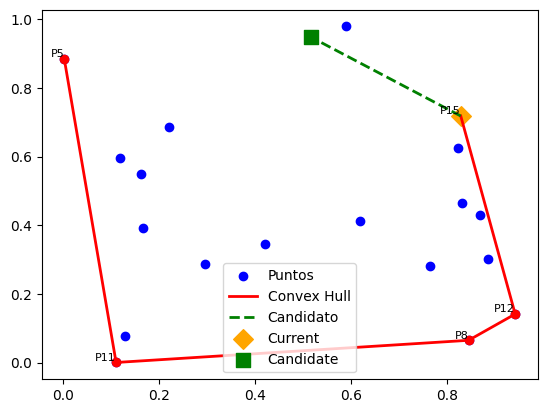

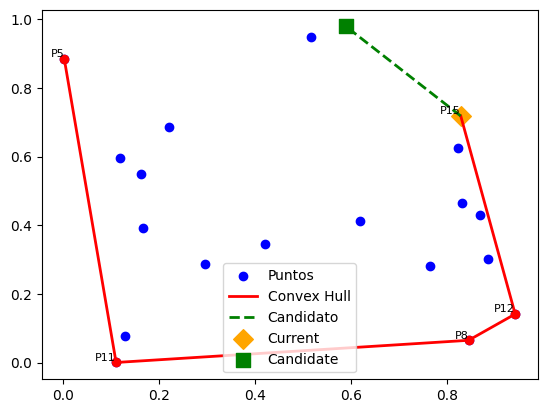

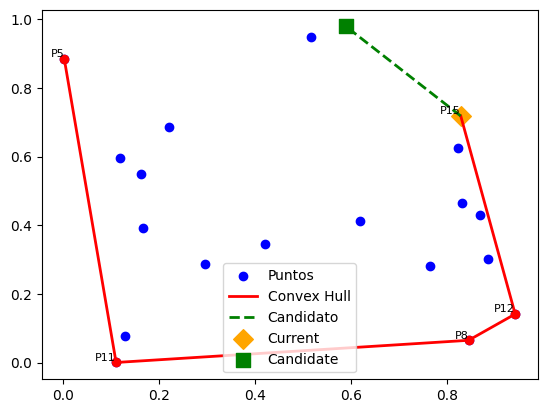

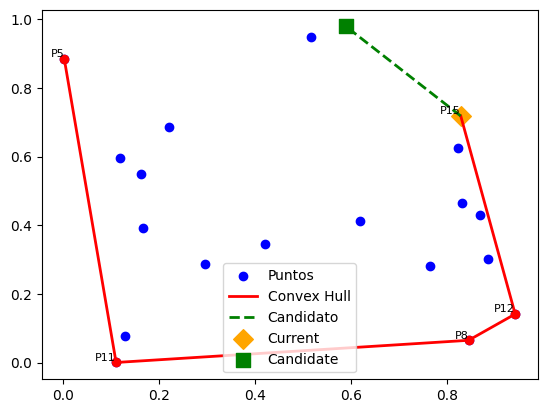

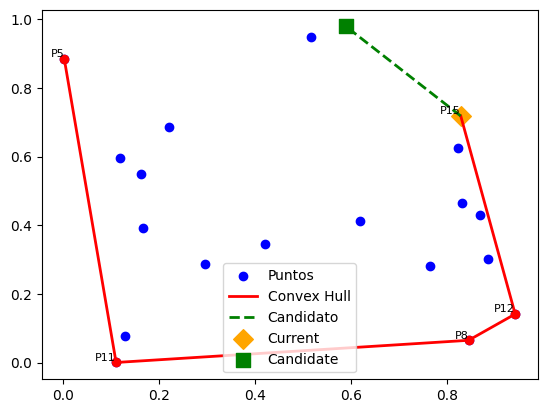

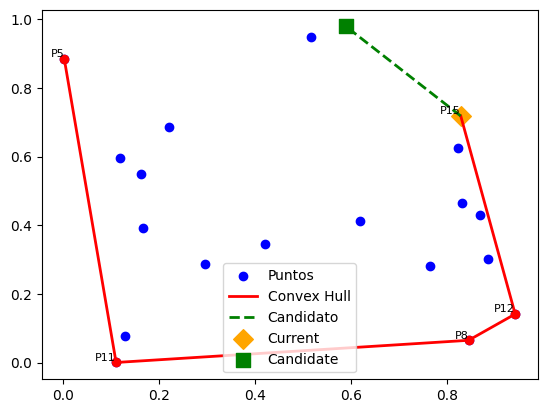

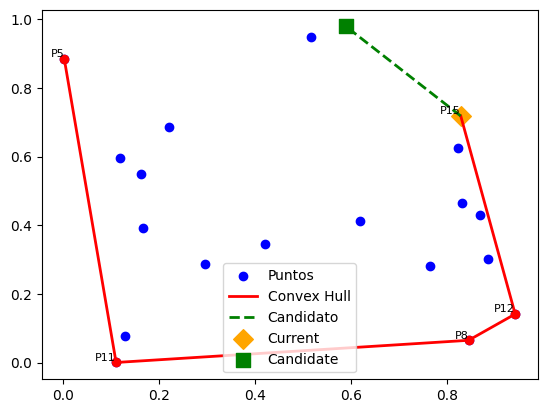

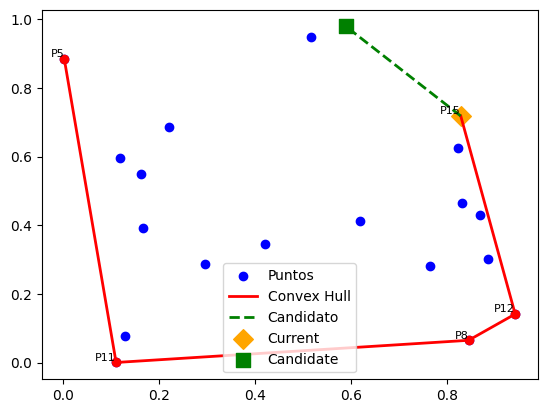

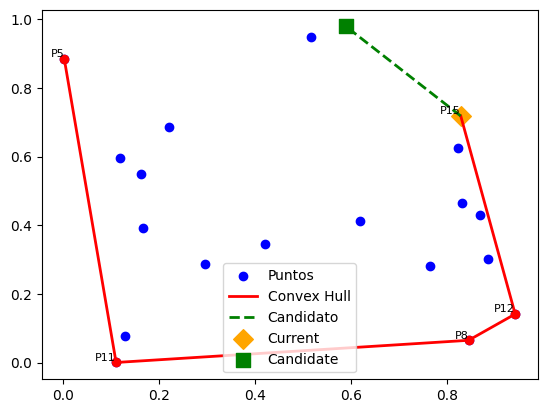

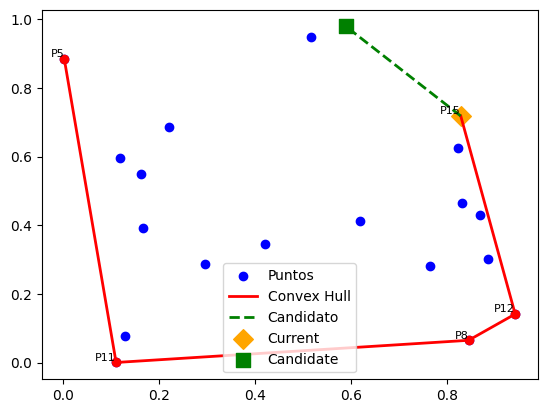

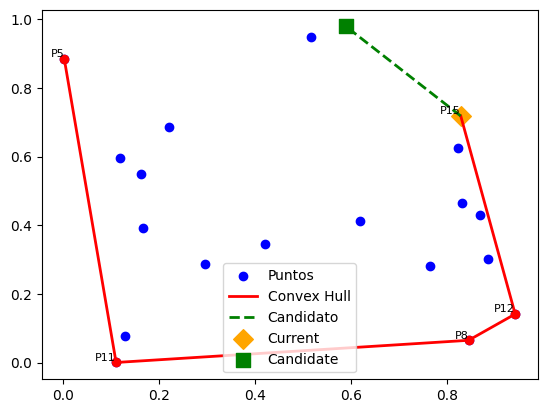

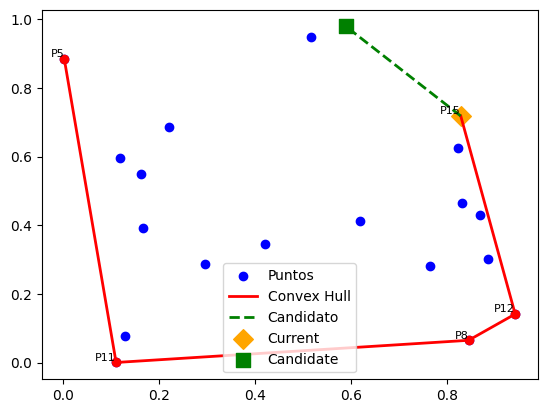

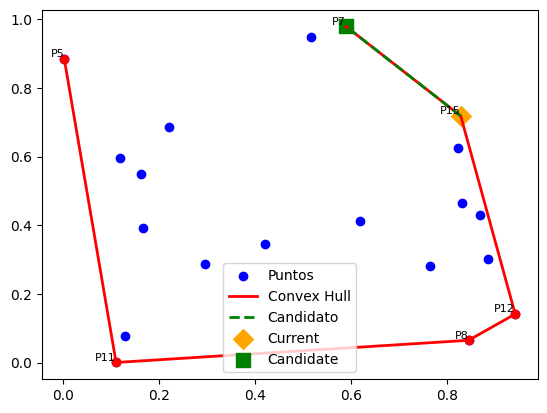

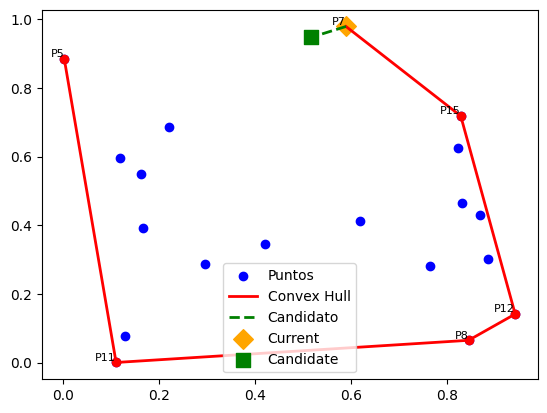

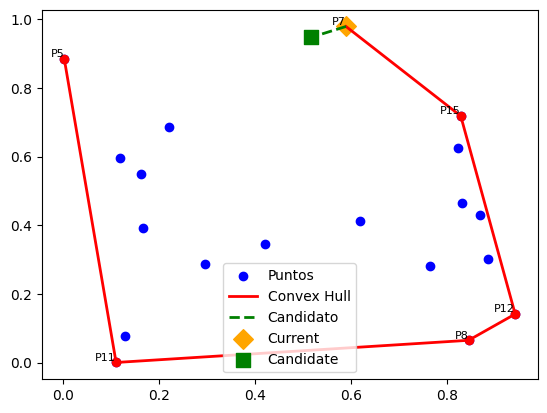

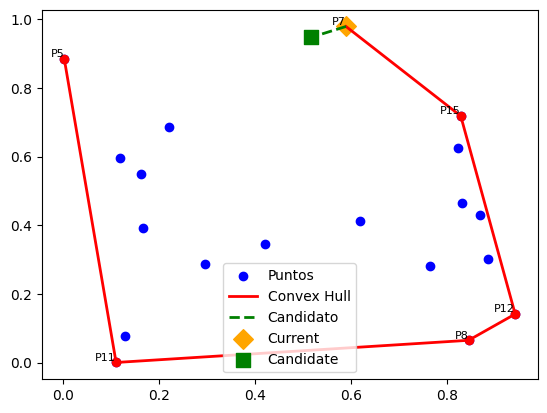

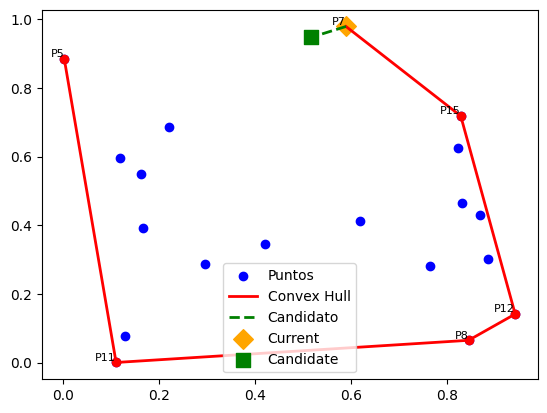

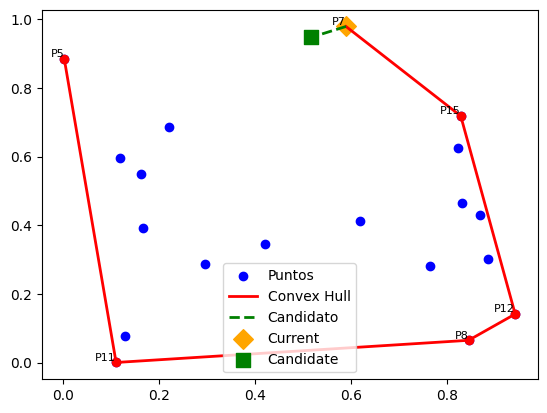

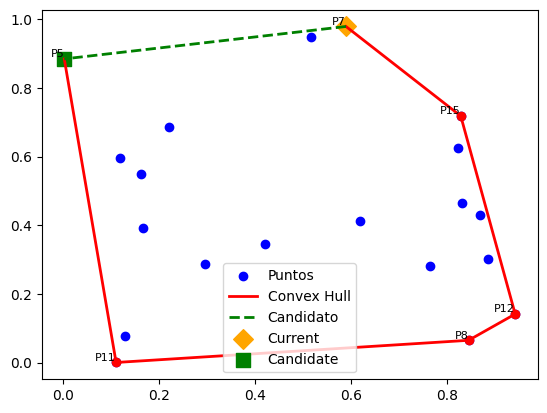

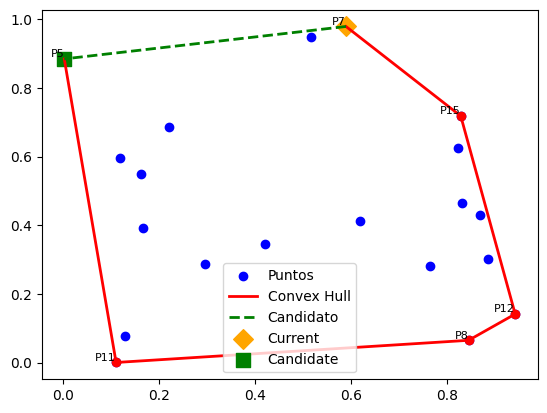

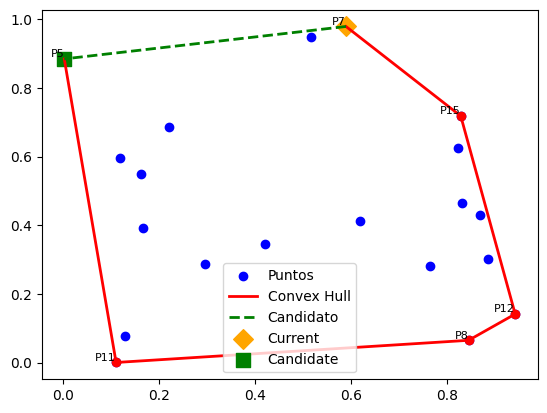

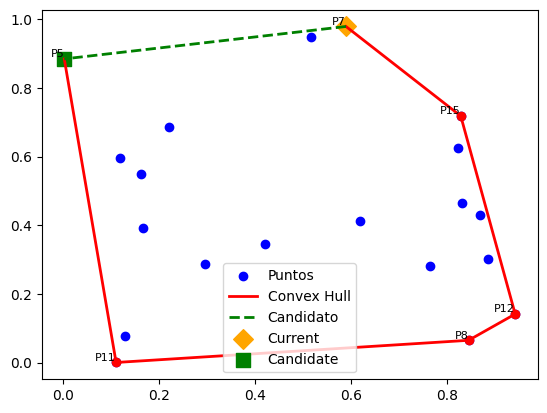

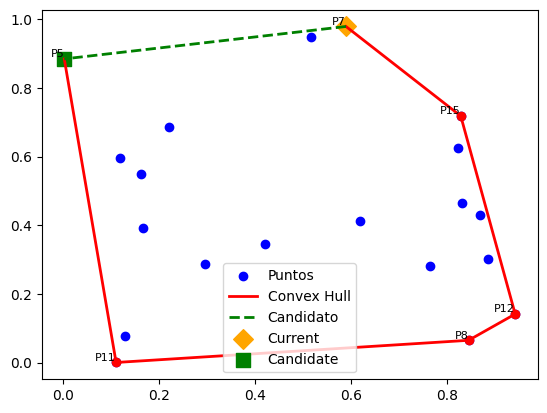

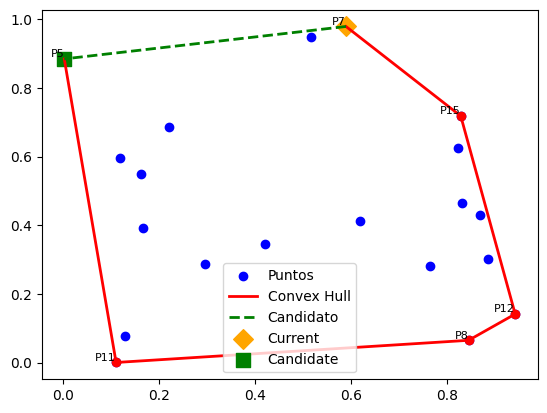

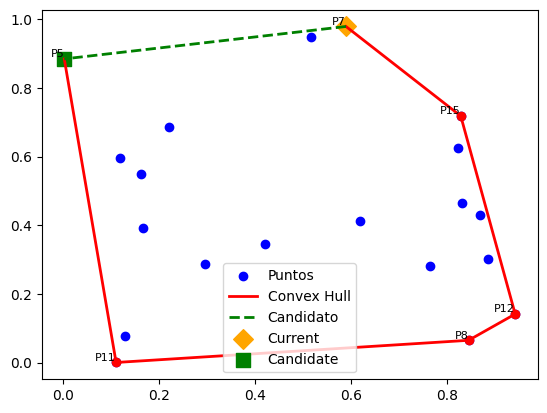

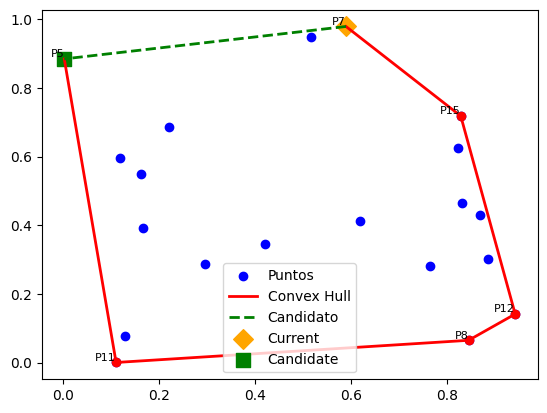

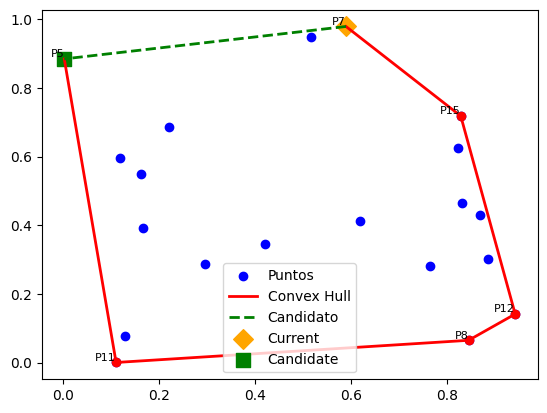

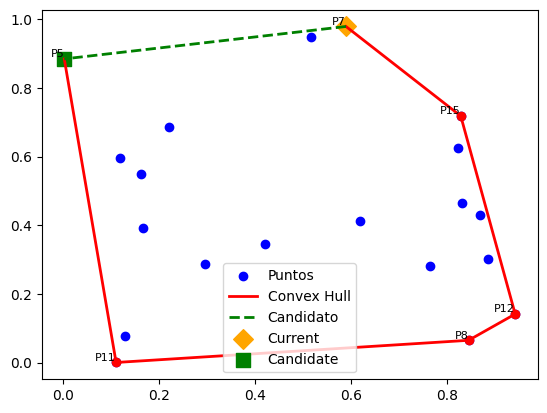

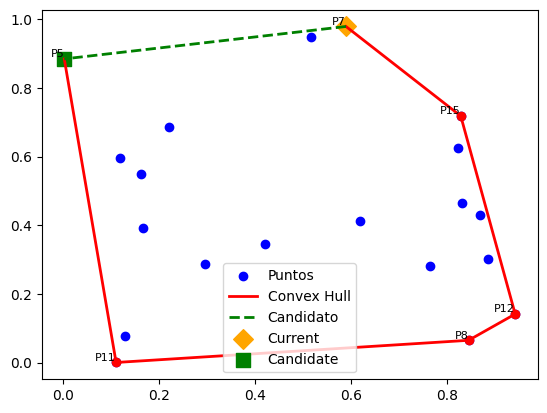

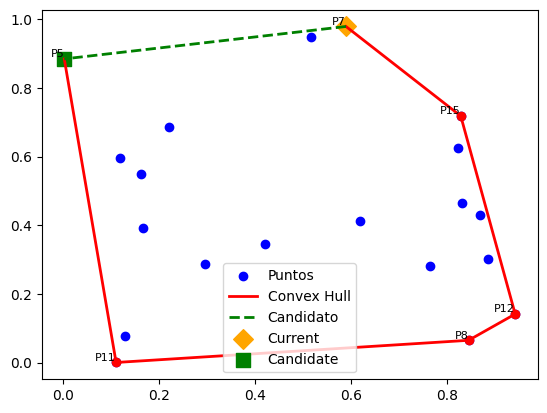

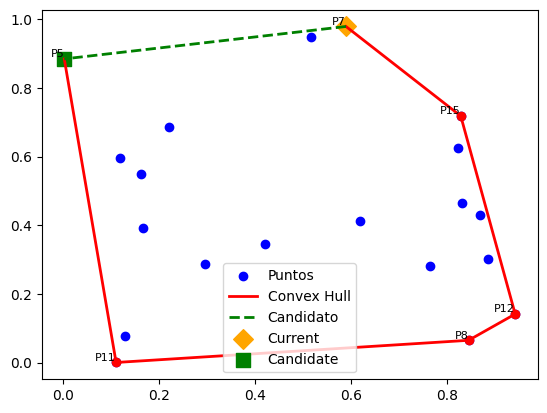

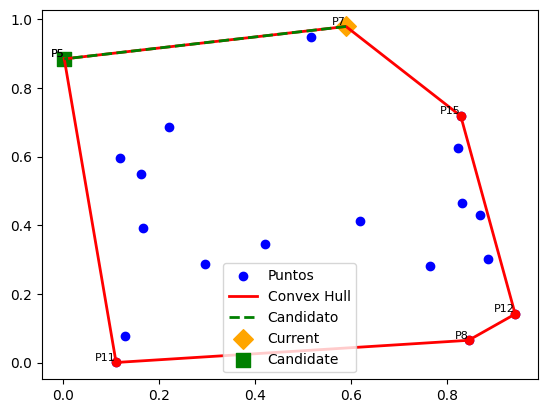

[P5 (0.002464881200886171, 0.8840321823721048),
 P11 (0.11047771391367378, 0.0005288111692760555),
 P8 (0.8450938221263111, 0.06507543905719348),
 P12 (0.9421662328554996, 0.14150075772518977),
 P15 (0.8287514843227557, 0.7178518382260383),
 P7 (0.5895818652147146, 0.9784269160148309),
 P5 (0.002464881200886171, 0.8840321823721048)]

In [10]:
np . random . seed ( 23 )
X = np . random . rand ( 20 , 2 )
pp=Points([0,0])
pp.reset_count()
points = [Points(p)for p in X]
convex_hull(points)

## Implement the sweep line algorithm 
and apply it to the set of segments provided in the attached file (segmentos.csv). Identify intersection points and intersectingsegments. Plot the process and the final result.

In [14]:
class Segment:
    segment_count = 0 
    def __init__(self, upper, lower):
        """ Crea un segmento ordenando los puntos según la relación de orden. """
        if upper < lower:  # Usamos la relación de orden en Points
            self.upper = upper  # Extremo superior
            self.lower = lower  # Extremo inferior
        else:
            self.upper = lower
            self.lower = upper

        Segment.segment_count += 1
        self.label = f"S{Segment.segment_count}"  # Nombre único del segmento


    def __str__(self):
        """ Representación legible del segmento. """
        return f"{self.label} (Upper: {self.upper.label}, Lower: {self.lower.label})"

    def __lt__(self, other):
        """ Compara segmentos en la línea de barrido. """
        return self.upper < other.upper  # Se usa la relación de orden entre puntos
    
    def __repr__(self):
        return self.__str__()

    def intersecta_con(self, other):
        """ Determina si dos segmentos se cruzan. """
        def ccw(A, B, C):
            """ Función auxiliar para determinar si tres puntos están en orden antihorario. """
            return (C.y - A.y) * (B.x - A.x) > (B.y - A.y) * (C.x - A.x)

        # Se determina si los segmentos se cruzan verificando la orientación de los puntos
        return (ccw(self.upper, other.upper, other.lower) != ccw(self.lower, other.upper, other.lower) and
                ccw(self.upper, self.lower, other.upper) != ccw(self.upper, self.lower, other.lower))
    
    def reset_count(self):
        Segment.segment_count = 0

def generate_random_segments(N, low_value, high_value):
    """Genera N segmentos aleatorios."""
    points = generate_random_points(N * 2, low_value, high_value)  # Generamos 2N puntos
    segments = [Segment(points[i], points[i + 1]) for i in range(0, len(points), 2)]
    return segments

def plot_segments(segments):
    """Visualiza los segmentos en un gráfico."""
    plt.figure(figsize=(6, 6))
    for seg in segments:
        # Cambiamos la etiqueta para mostrar el nombre del segmento
        plt.plot([seg.upper.x, seg.lower.x], [seg.upper.y, seg.lower.y], 
                 marker='o', 
                 label=seg.label)  # Usamos seg.label en lugar de f"{seg.upper.label}-{seg.lower.label}"
        
        # Mantenemos las etiquetas de los puntos
        plt.text(seg.upper.x, seg.upper.y, seg.upper.label, 
                fontsize=12, verticalalignment='bottom', horizontalalignment='right')
        plt.text(seg.lower.x, seg.lower.y, seg.lower.label, 
                fontsize=12, verticalalignment='top', horizontalalignment='right')
    
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Visualización de Segmentos")
    plt.legend(loc='upper right')  # Descomentamos plt.legend() y especificamos la ubicación
    plt.grid()
    plt.show()

In [15]:
class Evento:
    INICIO = "INICIO"
    FIN = "FIN"
    INTERSECCIÓN = "INTERSECCIÓN"

    def __init__(self, punto, tipo, segmentos=None):
        """
        Un evento en la línea de barrido.
        :param punto: Punto donde ocurre el evento.
        :param tipo: Tipo de evento (INICIO, FIN, INTERSECCIÓN).
        :param segmentos: Segmentos involucrados en el evento (lista).
        """
        self.punto = punto
        self.tipo = tipo
        self.segmentos = segmentos if segmentos else []

    def __lt__(self, other):
        """ Ordena los eventos en la lista de eventos. """
        if self.punto.y != other.punto.y:
            return self.punto.y > other.punto.y  # Primero el de mayor Y (barrido descendente)
        return self.punto.x < other.punto.x  # Si Y es igual, menor X primero

    def __str__(self):
        """ Representación legible del evento. """
        segmentos_str = ", ".join([s.label for s in self.segmentos])
        return f"Evento({self.tipo}, Punto={self.punto.label}, Segmentos=[{segmentos_str}])"

def insertar_evento(eventos, nuevo_evento):
    """
    Inserta un evento en la lista ordenada de eventos.
    """
    index = 0
    while index < len(eventos) and eventos[index] < nuevo_evento:
        index += 1
    eventos.insert(index, nuevo_evento)

def generar_eventos(segments):
    """
    Genera la lista de eventos a partir de una lista de segmentos.
    Retorna una lista ordenada de eventos.
    """
    eventos = []
    for seg in segments:
        insertar_evento(eventos, Evento(seg.upper, Evento.INICIO, [seg]))  # Evento de inicio
        insertar_evento(eventos, Evento(seg.lower, Evento.FIN, [seg]))  # Evento de fin
    return eventos

In [19]:
class NodoELB:
    def __init__(self, segmento):
        self.segmento = segmento
        self.left = None
        self.right = None

class ELB:
    def __init__(self):
        self.raiz = None
        self.y_actual = None

    def insert(self, entrada):
        """
        Inserta un evento o segmento en el árbol.
        :param entrada: Puede ser un Evento o un Segmento
        """
        self.y_actual = entrada.punto.y if isinstance(entrada, Evento) else self.y_actual
        
        if isinstance(entrada, Evento):
            for segmento in entrada.segmentos:
                self.raiz = self._insert(self.raiz, segmento)
        elif isinstance(entrada, Segment):
            self.raiz = self._insert(self.raiz, entrada)
        

    def _insert(self, nodo, segmento):
        """Inserta un segmento en el árbol basándose en la intersección con la línea de barrido."""
        if nodo is None:
            return NodoELB(segmento)
        
        # Si encontramos el mismo segmento, no lo insertamos
        if nodo.segmento == segmento:
            print(f"  Segmento {segmento} ya existe en el nodo actual")
            return nodo
        
        x_seg = self.interseccion_segmento_y(segmento, self.y_actual)
        x_nodo = self.interseccion_segmento_y(nodo.segmento, self.y_actual)
        
        if x_seg < x_nodo:
            nodo.left = self._insert(nodo.left, segmento)
        else:
            nodo.right = self._insert(nodo.right, segmento)
        
        return nodo
    
    
    def interseccion_segmento_y(self, segmento, y_actual):
        """ Calcula la coordenada X donde el segmento intersecta la línea de barrido en y_actual. """
        x1, y1 = segmento.upper.x, segmento.upper.y
        x2, y2 = segmento.lower.x, segmento.lower.y
        
        if y1 == y2:
            return x1  # Segmento horizontal, tomamos x de cualquier extremo
        
        pendiente = (x2 - x1) / (y2 - y1)
        x_interseccion = x1 + pendiente * (y_actual - y1)
        
        return x_interseccion
    
    def inorder(self):
        """ Retorna una lista de segmentos ordenados en el árbol. """
        return self._inorder(self.raiz, [])
    
    def _inorder(self, nodo, lista):
        if nodo is not None:
            self._inorder(nodo.left, lista)
            lista.append(nodo.segmento)
            self._inorder(nodo.right, lista)
        return lista
    
    def _balancear(self, segmentos):
        """ Crea un árbol balanceado a partir de una lista ordenada de segmentos. """
        if not segmentos:
            return None
        mid = len(segmentos) // 2
        nodo = NodoELB(segmentos[mid])
        nodo.left = self._balancear(segmentos[:mid])
        nodo.right = self._balancear(segmentos[mid + 1:])
        return nodo
    

    def eliminar_segmento(self, segmento):
        """ Elimina un nodo que contiene un segmento específico en el árbol. """
        self.raiz = self._eliminar_segmento(self.raiz, segmento)
    
    def _eliminar_segmento(self, nodo, segmento):
        """ Busca y elimina el nodo que contiene el segmento en el árbol. """
        if nodo is None:
            return None

        x_seg = self.interseccion_segmento_y(segmento, self.y_actual)
        x_nodo = self.interseccion_segmento_y(nodo.segmento, self.y_actual)

        if segmento == nodo.segmento:
            # Caso 1: Nodo sin hijos
            if nodo.left is None and nodo.right is None:
                return None
            # Caso 2: Nodo con un solo hijo
            if nodo.left is None:
                return nodo.right
            if nodo.right is None:
                return nodo.left
            # Caso 3: Nodo con dos hijos
            sucesor = self._encontrar_min(nodo.right)
            nodo.segmento = sucesor.segmento
            nodo.right = self._eliminar_segmento(nodo.right, sucesor.segmento)
            return nodo

        if x_seg < x_nodo:
            nodo.left = self._eliminar_segmento(nodo.left, segmento)
        else:
            nodo.right = self._eliminar_segmento(nodo.right, segmento)

        return nodo

    def _encontrar_min(self, nodo):
        """ Encuentra el nodo con el valor mínimo en el subárbol derecho. """
        while nodo.left is not None:
            nodo = nodo.left
        return nodo
   
    def ordenar_justo_debajo(self, p, epsilon=1e-5):
        """
        Reorganiza los segmentos en TAO según su intersección con la línea de barrido justo debajo de p.
        :param p: El punto de referencia.
        :param epsilon: Pequeño valor para ajustar la línea de barrido.
        """
        segmentos_antes = self.inorder()
        self.y_actual = p.y - epsilon
        
        # Ordenar segmentos basados en su intersección con la nueva línea de barrido
        segmentos_ordenados = sorted(segmentos_antes, 
                                    key=lambda s: self.interseccion_segmento_y(s, self.y_actual))
        
        # Solo reconstruir el árbol si hubo cambios en el orden
        if segmentos_ordenados != segmentos_antes:
            self.raiz = self._balancear(segmentos_ordenados)
        
    def encontrar_vecinos(self, p):
        """
        Encuentra los segmentos inmediatamente a la izquierda (Sl) y a la derecha (Sr) de p en TAO.
        :param p: Objeto de tipo Points (punto actual de la línea de barrido).
        :return: (Sl, Sr) → Segmentos vecinos izquierdo y derecho.
        """
        segmentos = self.inorder()  # Obtener segmentos en orden de intersección con la línea de barrido
        Sl, Sr = None, None

        for segmento in segmentos:
            x_interseccion = self.interseccion_segmento_y(segmento, p.y)

            if x_interseccion < p.x:
                Sl = segmento  # Último segmento que queda a la izquierda
            elif x_interseccion > p.x and Sr is None:
                Sr = segmento  # Primer segmento que queda a la derecha
                break  # No necesitamos seguir buscando

        return Sl, Sr

    def encontrar_segmentos_izquierda(self, p, conjunto_cp_up):
        """
        Encuentra S' (el segmento más a la izquierda en C(p) U U(p)) dentro de TAO.
        Encuentra Sl (el segmento inmediatamente a la izquierda de p en TAO).
        
        :param p: Punto de referencia en la línea de barrido.
        :param conjunto_cp_up: Conjunto (C(p) ∪ U(p)) de segmentos activos en p.
        :return: (S', Sl) → Segmento más a la izquierda en C(p) ∪ U(p) y segmento inmediatamente a la izquierda de p.
        """
        segmentos = self.inorder()  # Obtener segmentos en orden
        print("orden de segmentos en TAO", segmentos)
        S_prima, Sl = None, None

        # Buscar S' (segmento más a la izquierda en C(p) ∪ U(p))
        min_x = float('inf')
        for i in segmentos:
            if i in conjunto_cp_up:
                S_prima = i
                break
         
        # for segmento in conjunto_cp_up:
        # for segmento in conjunto_cp_up:
        #     x_interseccion = self.interseccion_segmento_y(segmento, p.y)
        #     if x_interseccion < min_x:
        #         min_x = x_interseccion
        #         S_prima = segmento

        # Buscar Sl (segmento inmediatamente a la izquierda de p)
        for segmento in segmentos:
            x_interseccion = self.interseccion_segmento_y(segmento, p.y)
            if x_interseccion < p.x:
                Sl = segmento  # Último segmento antes de p
            else:
                break  # No necesitamos seguir buscando

        return S_prima, Sl

    def encontrar_segmentos_derecha(self, p, conjunto_cp_up):
            """
            Encuentra S'' (el segmento más a la derecha en C(p) U U(p)) dentro de TAO.
            Encuentra Sr (el segmento inmediatamente a la derecha de p en TAO).
            
            :param p: Punto de referencia en la línea de barrido.
            :param conjunto_cp_up: Conjunto (C(p) ∪ U(p)) de segmentos activos en p.
            :return: (S'', Sr) → Segmento más a la derecha en C(p) ∪ U(p) y segmento inmediatamente a la derecha de p.
            """
            segmentos = self.inorder()  # Obtener segmentos en orden
            S_doble_prima, Sr = None, None

            # Buscar S'': recorremos la lista TAO y actualizamos S_doble_prima cada vez que el segmento esté en conjunto_cp_up.
            # Al finalizar el bucle, S_doble_prima será el último segmento encontrado en TAO que pertenece a conjunto_cp_up.
            for segmento in segmentos:
                if segmento in conjunto_cp_up:
                    S_doble_prima = segmento
            # Buscar S'' (segmento más a la derecha en C(p) ∪ U(p))
            # max_x = float('-inf')
            # for segmento in conjunto_cp_up:
            #     x_interseccion = self.interseccion_segmento_y(segmento, p.y)
            #     if x_interseccion > max_x:
            #         max_x = x_interseccion
            #         S_doble_prima = segmento

            # Buscar Sr (segmento inmediatamente a la derecha de p)
            for segmento in segmentos:
                x_interseccion = self.interseccion_segmento_y(segmento, p.y)
                if x_interseccion > p.x:
                    Sr = segmento  # Primer segmento después de p
                    break  # No necesitamos seguir buscando

            return S_doble_prima, Sr




def manipular_punto_p(p, segmentos_activos, epsilon=1e-10):
    """
    Clasifica los segmentos relacionados con un punto p.
    
    :param p: Punto de referencia
    :param segmentos_activos: Segmentos actuales en la línea de barrido
    :param epsilon: Tolerancia para comparaciones numéricas
    :return: (upper_p, lower_p, contain_p)
    """
    upper_p = set()
    lower_p = set()
    contain_p = set()

    # print(f"\nAnalizando punto {p}")
    # print(f"Segmentos activos a analizar: {segmentos_activos}")

    for segmento in segmentos_activos:
        # Verificar si el punto es extremo superior
        if abs(p.x - segmento.upper.x) < epsilon and abs(p.y - segmento.upper.y) < epsilon:
            # print(f"  {segmento} tiene a {p} como punto superior")
            upper_p.add(segmento)
            continue
            
        # Verificar si el punto es extremo inferior
        if abs(p.x - segmento.lower.x) < epsilon and abs(p.y - segmento.lower.y) < epsilon:
            # print(f"  {segmento} tiene a {p} como punto inferior")
            lower_p.add(segmento)
            continue

        # Si no es extremo, verificar si está contenido en el segmento
        def punto_en_segmento(p, segmento):
            """
            Verifica si un punto está en un segmento usando distancias.
            """
            def distancia_punto_a_linea(p, a, b):
                num = abs((b.x - a.x) * (a.y - p.y) - (a.x - p.x) * (b.y - a.y))
                den = np.sqrt((b.x - a.x)**2 + (b.y - a.y)**2)
                return num/den if den != 0 else 0
            
            # Verificar si el punto está cerca de la línea
            if distancia_punto_a_linea(p, segmento.upper, segmento.lower) > epsilon:
                return False
                
            # Verificar si el punto está dentro del rango del segmento
            x_min, x_max = min(segmento.upper.x, segmento.lower.x), max(segmento.upper.x, segmento.lower.x)
            y_min, y_max = min(segmento.upper.y, segmento.lower.y), max(segmento.upper.y, segmento.lower.y)
            
            return (x_min - epsilon <= p.x <= x_max + epsilon and 
                    y_min - epsilon <= p.y <= y_max + epsilon)

        if punto_en_segmento(p, segmento):
            # print(f"  {segmento} contiene a {p} en su interior")
            contain_p.add(segmento)

    # print(f"\nResultados para punto {p}:")
    # print(f"  Upper_p: {upper_p}")
    # print(f"  Lower_p: {lower_p}")
    # print(f"  Contain_p: {contain_p}")
    
    return upper_p, lower_p, contain_p

def evaluar_interseccion(seg1, seg2):
    """
    Evalúa si dos segmentos se cruzan y, si lo hacen, crea un nuevo evento de intersección.
    :param seg1: Primer segmento
    :param seg2: Segundo segmento
    :return: Evento de intersección si se cruzan, None en caso contrario.
    """
    
    # Verificación de tipos
    if not isinstance(seg1, Segment) or not isinstance(seg2, Segment):
        # print(f"Error: Los argumentos deben ser de tipo Segment")
        # print(f"Tipo de seg1: {type(seg1)}")
        # print(f"Tipo de seg2: {type(seg2)}")
        return None

    def ccw(A, B, C):
        """ 
        Determina si los puntos están en orden antihorario.
        Si el resultado es positivo → Antihorario
        Si es negativo → Horario
        Si es 0 → Son colineales
        """
        return (C.y - A.y) * (B.x - A.x) > (B.y - A.y) * (C.x - A.x)

    # Verificar si los segmentos se cruzan usando el criterio de orientación
    # print(seg1,seg2)
    A, B = seg1.upper, seg1.lower
    C, D = seg2.upper, seg2.lower

    intersecan = (ccw(A, C, D) != ccw(B, C, D)) and (ccw(A, B, C) != ccw(A, B, D))

    if not intersecan:
        return None  # No hay intersección

    # Si se cruzan, calcular la intersección real
    def calcular_interseccion(A, B, C, D):
        """ Calcula el punto de intersección entre los segmentos AB y CD. """
        det = (A.x - B.x) * (C.y - D.y) - (A.y - B.y) * (C.x - D.x)

        if det == 0:
            return None  # Son colineales o paralelos

        x_inter = ((A.x * B.y - A.y * B.x) * (C.x - D.x) - (A.x - B.x) * (C.x * D.y - C.y * D.x)) / det
        y_inter = ((A.x * B.y - A.y * B.x) * (C.y - D.y) - (A.y - B.y) * (C.x * D.y - C.y * D.x)) / det

        return Points((x_inter, y_inter),label="Pi")

    punto_interseccion = calcular_interseccion(A, B, C, D)
    # print(f"Objeto punto interseccion: {punto_interseccion}")

    if punto_interseccion is None:
        return None

    # Crear un nuevo evento de intersección
    nuevo_evento = Evento(punto_interseccion, Evento.INTERSECCIÓN, [seg1, seg2])
    
    return nuevo_evento

def validar_evento_interseccion(evento, y_actual, epsilon=1e-10):
    """
    Valida si un evento de intersección es válido (está por debajo de la línea de barrido actual)
    """
    if evento is None or evento.tipo != Evento.INTERSECCIÓN:
        return False
        
    return evento.punto.y < y_actual - epsilon



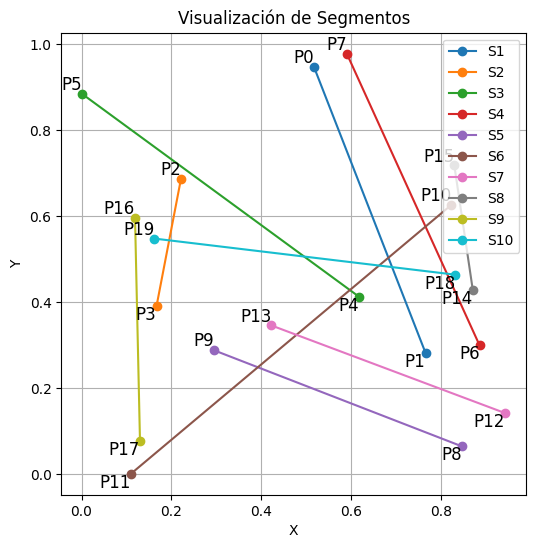

In [20]:
seg = pd.read_csv("../Tareas/segmentos.csv")

segments = []
pp = Points([0, 0])
ss = Segment(pp, pp)
ss.reset_count()
pp.reset_count()
for i in seg.itertuples():
    upper = Points((i.x0, i.y0))
    lower = Points((i.x1, i.y1))
    segmento = Segment(upper, lower)
    segments.append(segmento)

plot_segments(segments)

In [21]:
def update_resultado(resultado, punto, complementos_nuevos):
    """
    Actualiza el diccionario 'resultado' para el punto 'punto'.
    Si 'punto' ya existe, se verifica si el conjunto de complementos es igual:
      - Si es igual, no se hace nada.
      - Si es diferente, se hace la unión de los complementos.
    Si 'punto' no existe, se agrega con 'complementos_nuevos'.
    """
    if punto in resultado:
        # Si el conjunto ya es igual, no se actualiza
        if resultado[punto] == complementos_nuevos:
            return resultado
        else:
            # Se une el conjunto existente con los nuevos complementos
            resultado[punto] = resultado[punto].union(complementos_nuevos)
            return resultado
    else:
        resultado[punto] = complementos_nuevos
        return resultado

print("\n=== Generando eventos iniciales ===")
eventos_cola = generar_eventos(segments)
print(f"Eventos iniciales generados: {len(eventos_cola)}")
for e in eventos_cola:
    print(f"  {e}")

resultado = {}
evento = eventos_cola.pop(0)
estado_LB = ELB()
estado_LB.insert(evento)
print("\n=== Iniciando procesamiento de eventos ===")
iteracion = 1
while len(eventos_cola) > 0:
    if iteracion == 30:
        break
    print(f"\n--- Iteración {iteracion} ---")
    evento = eventos_cola.pop(0)
    print(f"Procesando evento: {evento}")

    if len(estado_LB.inorder()) == 1:
        estado_LB.insert(evento)
        print(f"Estado de la línea de barrido después de inserción:")
        print(f"Segmentos activos: {(estado_LB.inorder())}")
        
    

    else:
        print(f"Estado de la línea de barrido después de inserción:")
        print(f"Segmentos activos: {(estado_LB.inorder())}")

        p = evento.punto
        segmentos = estado_LB.inorder()
        print(f"\nPunto actual: {p}")
        print(f"Segmentos activos: {segmentos}")

        # estado_LB.insert(evento)
        segmentos = segmentos + evento.segmentos
        upper_p, lower_p, contain_p = manipular_punto_p(p, segmentos)
        print(f"Clasificación de segmentos:")
        print(f"  Upper_p: {upper_p}")
        print(f"  Lower_p: {lower_p}")
        print(f"  Contain_p: {contain_p}")
        
        union_total = upper_p | lower_p | contain_p
        if len(union_total) > 1:
            #antes de insertar el nuevo segmento en resultado debo verificar si lo que se va a insertar ya existe 
            # update_resultado(resultado, p, union_total)
            resultado[p] = union_total
            print(f"¡Intersección encontrada en {p}!")
            print(f"Segmentos involucrados: {union_total}")
        
        print("\nActualizando estado de la línea de barrido...")
        for i in lower_p | contain_p:
            print(f"  Eliminando: {i}")
            estado_LB.eliminar_segmento(i)
        
        for i in upper_p | contain_p:
            #antes de insertar el segmento en p debo ordenar justo abajo 
            estado_LB.ordenar_justo_debajo(p)
            print(f"  Insertando: {i}")
            estado_LB.insert(i)
        
        
        print(f"Nuevo estado después de ordenar: {estado_LB.inorder()}")

        conjunto_cp_up = upper_p | contain_p
        #ordenado como seria justo debajo de p
        print(f"\nConjunto C(p) ∪ U(p): {conjunto_cp_up}")
        if len(contain_p) >0:
            estado_LB.ordenar_justo_debajo(p)
        if len(conjunto_cp_up) == 0:
            print("Buscando vecinos...")
            Sl, Sr = estado_LB.encontrar_vecinos(p)
            print(f"  Vecino izquierdo: {Sl}")
            print(f"  Vecino derecho: {Sr}")
            
            if Sr is not None and Sl is not None:
                val = evaluar_interseccion(Sl, Sr)
                if val is not None:
                    print(f"  ¡Nueva intersección potencial encontrada!: {val}")
                    insertar_evento(eventos_cola, val)
        
        else:
            print("\nBuscando intersecciones con vecinos...")
            
            s_prima, Sl = estado_LB.encontrar_segmentos_izquierda(p, conjunto_cp_up)
            print(f"Izquierda - S': {s_prima}, Sl: {Sl}")
            
            if s_prima is not None and Sl is not None:
                val = evaluar_interseccion(s_prima, Sl)
                # print("ESTE ES VAL", val)
                if val is not None:
                    print(f"  ¡Nueva intersección izquierda encontrada!: {val}")
                    insertar_evento(eventos_cola, val)
            # estado_LB.ordenar_justo_debajo(p)
            S_doble_prima, Sr = estado_LB.encontrar_segmentos_derecha(p, conjunto_cp_up)
            print(f"Derecha - S'': {S_doble_prima}, Sr: {Sr}")
            
            if S_doble_prima is not None and Sr is not None:
                val = evaluar_interseccion(S_doble_prima, Sr)
                if val is not None:
                    print(f"  ¡Nueva intersección derecha encontrada!: {val}")
                    insertar_evento(eventos_cola, val)
    
    iteracion += 1


=== Generando eventos iniciales ===
Eventos iniciales generados: 20
  Evento(INICIO, Punto=P7, Segmentos=[S4])
  Evento(INICIO, Punto=P0, Segmentos=[S1])
  Evento(INICIO, Punto=P5, Segmentos=[S3])
  Evento(INICIO, Punto=P15, Segmentos=[S8])
  Evento(INICIO, Punto=P2, Segmentos=[S2])
  Evento(INICIO, Punto=P10, Segmentos=[S6])
  Evento(INICIO, Punto=P16, Segmentos=[S9])
  Evento(INICIO, Punto=P19, Segmentos=[S10])
  Evento(FIN, Punto=P18, Segmentos=[S10])
  Evento(FIN, Punto=P14, Segmentos=[S8])
  Evento(FIN, Punto=P4, Segmentos=[S3])
  Evento(FIN, Punto=P3, Segmentos=[S2])
  Evento(INICIO, Punto=P13, Segmentos=[S7])
  Evento(FIN, Punto=P6, Segmentos=[S4])
  Evento(INICIO, Punto=P9, Segmentos=[S5])
  Evento(FIN, Punto=P1, Segmentos=[S1])
  Evento(FIN, Punto=P12, Segmentos=[S7])
  Evento(FIN, Punto=P17, Segmentos=[S9])
  Evento(FIN, Punto=P8, Segmentos=[S5])
  Evento(FIN, Punto=P11, Segmentos=[S6])

=== Iniciando procesamiento de eventos ===

--- Iteración 1 ---
Procesando evento: Event

In [16]:

print("\n=== Resultados finales ===")
resultado = {punto: resultado[punto] for punto in set(resultado.keys())}
for keys in resultado:
    print(f"\nIntersección en punto: {keys}")
    print(f"Segmentos involucrados: {resultado[keys]}")


=== Resultados finales ===

Intersección en punto: Pi (0.764947017812628, 0.5759183794001299)
Segmentos involucrados: {S6 (Upper: P10, Lower: P11), S4 (Upper: P7, Lower: P6)}

Intersección en punto: Pi (0.194894444941408, 0.5438697557921102)
Segmentos involucrados: {S2 (Upper: P2, Lower: P3), S10 (Upper: P19, Lower: P18)}


In [ ]:
1+11

12